# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style='border:solid green 2px; padding: 20px'>
     
### Постановка задачи

**Цели и задачи исследования:**
- установить параметры для выявления рыночной стоимости объектов недвижимости на основе полученных данных
- выявить аномалии в данных и мошенническую деятельность
- определить недостатки сбора данных двух видов: 1) вписанные пользователем, 2) полученные автоматически на основе картографических данных

    
**Методика исследования:**
- предобработка данных для анализа алгоритvами и инструментами работы с данными в формате **csv**
- статистические методы анализа данных

**Алгоритм работы**
1) Обзор данных
2) Предобработка данных
3) Расчёты и добавление результатов в таблицу
4) Исследовательский анализ данных
5) Обобщение работы, выводы

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>

<font color='green'><b>Все отлично! 👍:</b>  </font>

    
Здорово, что есть вступление к твоему проекту. Так получатель отчета сможет быстрей его понять.
    
</div>

## 1. Изучение входных данных

### 1.1 Импорт данных

In [1]:
# импорт необходимых библиотек в проекте
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# откроем датафрейм (try - по ссылке, except - локально), посмотрим на содержимое
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('data/real_estate_data.csv', sep='\t')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### 1.2 Общая информация о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Запишем общее количество строк в переменную **len_data_in**, чтобы рассчитать процент уменьшения датасета на выходе **len_data_out**

In [4]:
len_data_in = len(data)
len_data_in

23699

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- в датафрейме 22 колонки
- количество строк в столбцах отличается,
- максимум строк в таблице: 23 699
- есть разные виды значений (int64 - целые числа, float64 - вещественные числа с плавающей запятой, object - строковые, bool - логические значения)

### 1.3 Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### 1.4 Общая гистограмма для всех числовых столбцов датафрейма

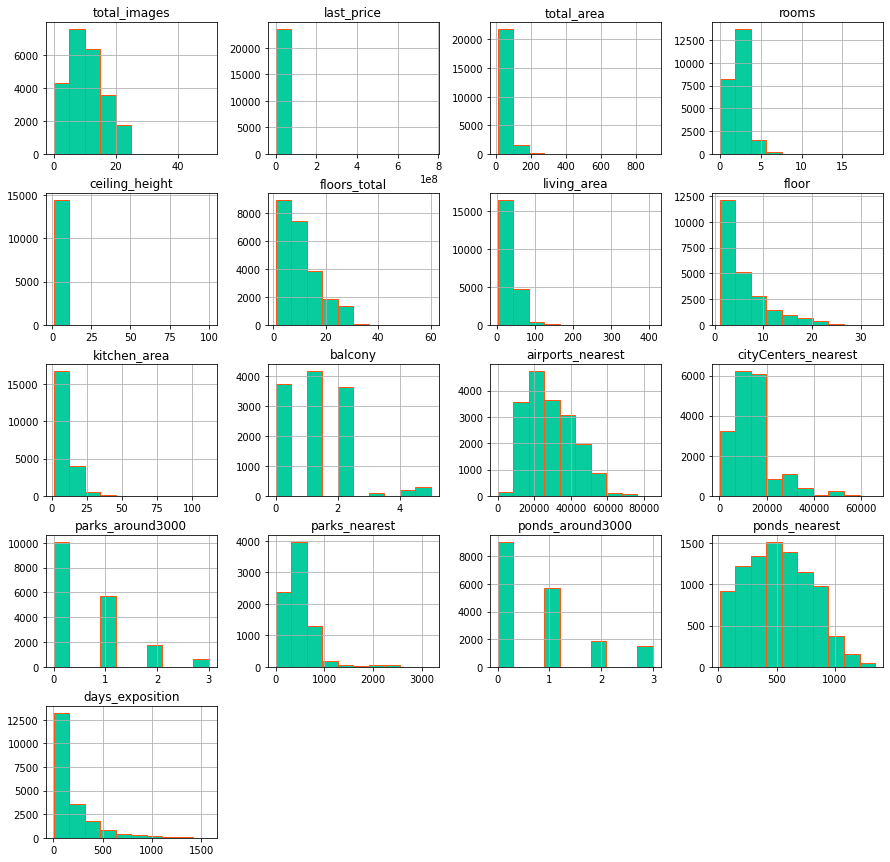

In [5]:
# откроем датафрейм, посмотрим на содержимое
data.hist(figsize=(15, 15), color='#08cc9e', ec='#fc5a14')
plt.show()

Обобщенный вывод по гистограммам:
- **total_images:** объем и качество данных в норме, есть небольшой выброс данных после 25
- **last_price:** данные неинформативны, требуется детальный осмотр, возможно, недостаточен диапазон (количество корзин) для визуализации 
- **total_area:** данные неинформативны, требуется детальный осмотр, возможно, недостаточен диапазон (количество корзин) для визуализации
- **rooms:** недостаточен диапазон (количество корзин) для визуализации
- **ceiling_height:** данные неинформативны, требуется детальный осмотр, возможно, недостаточен диапазон (количество корзин) для визуализации, есть пропуски в строках
- **floors_total:** объем и качество данных в норме
- **living_area:**  недостаточен диапазон (количество корзин) для визуализации, есть пропуски в строках
- **floor:** объем и качество данных в норме
- **kitchen_area:** недостаточен диапазон (количество корзин) для визуализации, есть пропуски в строках
- **balcony:** данные требуют анализа, есть много пропусков в строках
- **airports_nearest:**  , есть много пропусков в строках
- **cityCenters_nearest:** распределение данных нормальное, есть пропуски в строках
- **parks_around3000:**  качество данных в норме, есть пропуски в строках
- **parks_nearest:**  недостаточен диапазон (количество корзин) для визуализации, очень много пропусков в строках
- **ponds_around3000:** качество данных в норме, есть пропуски в строках
- **ponds_nearest:**  распределение данных нормальное, есть много пропусков в строках
- **days_exposition:**  недостаточен диапазон (количество корзин) для визуализации, есть пропуски в строках

<br> Остальные столбцы датафрейма без гистограмм:
- **first_day_exposition:** дата публикации
- **locality_name:** название населённого пункта
- **is_apartment:** апартаменты (булев тип)
- **studio:** квартира-студия (булев тип)
- **open_plan:** свободная планировка (булев тип)

Пропуски в столбцах:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Основные статистические данные датафрейма

In [7]:
np.round(data.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6541548.77,10887013.27,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,60.35,35.65,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,10.67,6.60,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,34.46,22.03,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.89,4.89,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,10.57,5.91,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.15,1.07,0.0,0.00,1.00,2.0,5.0


<div style='border:solid blue 2px; padding: 20px'>

**Выводы по входным данным:**
- много пропусков
- есть аномалии (разброс) в значениях, такие как: минимальная (1 2190 р.) и максимальная (763 000 000 р.) стоимость жилья, общая площадь, высота потолков, жилая площадь (2 м²), площадь кухни (мин 1.3 м², макс 112 м².)
- разные форматы данных требуют приведения к единому типу в соответствии категории столбца
- требуются предварительная обработка
- переименование колонок в правильный формат(cityCenters_nearest, parks_around3000, ponds_around3000) 



## 2. Предобработка данных 

### 2.1 Анализ пропусков в столбцах

Визуализация пропущенных данных по строкам датафрейма

<AxesSubplot:>

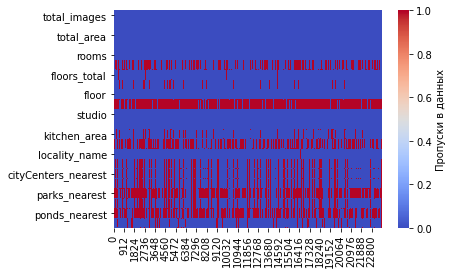

In [8]:
sns.heatmap(data.isna().transpose(), cmap="coolwarm", cbar_kws={'label': 'Пропуски в данных'})

Доля пропусков по столбцам:

In [9]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Приведем имена некоторых столбцов к единому стилю

In [10]:
# Переименование названий колонок
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

In [11]:
# заменяем пропуски на False
data['is_apartment'].fillna(False, inplace=True)

# проверка
data['is_apartment'].isna().sum()

0

Сделаем замену пропусков в столбце **floors_total** на значения из колонки **floor**

In [12]:
data['floors_total']=data['floors_total'].fillna(data['floor'])

In [13]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Заполним пропуски в столбце **kitchen_area** отношением к общей площади 

In [14]:
# посмотрим на данные до замены пропусков
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
# посчитаем медиану отношения всех кохонь к общей площади, запишем в переменную
kitchen_percent_median = (data['kitchen_area'] / data['total_area']).median()

# посмотрим сколько вышло
kitchen_percent_median

0.1724137931034483

In [17]:
# заменим пропуски выражением "доля кухонь * общая площадь"
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area'] * kitchen_percent_median))

# проверим как изменился результат
data['kitchen_area'].describe()

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что пропуски в столбце с кухнями заполнены, аналагичным образом заполним пропуски в столбце жилая площадь **living_area**

Заполним пропуски в столбце **kitchen_area** отношением к общей площади

In [19]:
# посчитаем медиану отношения всех кохонь к общей площади, запишем в переменную
living_area_percent_median = (data['living_area'] / data['total_area']).median()

# посмотрим сколько вышло
living_area_percent_median

0.5678598992678503

In [20]:
# заменим пропуски выражением "доля кухонь * общая площадь"
data['living_area'] = data['living_area'].fillna((data['total_area'] * living_area_percent_median))

# проверим как изменился результат
data['living_area'].describe()

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

<div style='border:solid blue 2px; padding: 20px'>

**Выводы по пропускам:**
- is_apartment: 20924 пропусков. Такое количеситво пропусков может указывать на некорректность заполнения данных, вероятно, что в пустых строках подразумевалось занчение False (не апартаменты), а там где указано False нужно заменить на True. Т.е., инвертировать значения 
- заменим пропуски в столбцах last_price, floors_total, balcony, airports_nearest, city_centers_nearest, parks_around_3000, ponds_around_3000, days_exposition, на значение "0", потом исключим их при анализе на следующем этапе
- в столбеце "floors_total" всего 86 пропусков. Возможно, пропуски были по причини нежалания продавца указывать, что квартира на последнем этаже. Поэтому сделали замену на значения из колонки **floor**
- заменены пропуски в столбцах **living_area** и **kitchen_area** через медианное отношение к общей площади

## 2.2 Анализ типов данных

Изучив основную информацию о датафрейме в п. 1.2 , в столбцах перечисленных ниже необходимо изменить тип данных на целые числа **(integer)**:<br>
**last_price** — цена на момент снятия с публикации<br>
**floors_total** — всего этажей в доме<br>
**balcony** — число балконов<br>
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)<br>
**city_centers_nearest** — расстояние до центра города (м)<br>
**parks_around_3000** — число парков в радиусе 3 км<br>
**ponds_around_3000** — число водоёмов в радиусе 3 км<br>
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)<br>
<br>
Для этого предварительно заменим пропуски на нули. После исправления выведем исправленный датафрейм

In [21]:
data['last_price'] = data['last_price'].fillna(value = 0)
data['balcony'] = data['balcony'].fillna(value = 0)
data['airports_nearest'] = data['airports_nearest'].fillna(value = 0)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value = 0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(value = 0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value = 0)
data['days_exposition'] = data['days_exposition'].fillna(value = 0)


data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
city_centers_nearest        0
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition             0
dtype: int64

Приведем формат даты в столбце **first_day_exposition** в читабельный вид

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

## 2.3 Дубликаты в данных. Уникальные значения

Проверим наличие полных (явных) дубликатов в исходных данных:

In [23]:
data.duplicated().sum()

0

Разные комбинаций одних и тех же названий в данном датафрейме могут быть только в колонке locality_name - название населённого пункта. Рассмотрим их:

In [24]:
# выведем уникальные значения locality_name, отсортируем их по алфавиту для наглядностит уникальных значений
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Уникальных значений много. Посчитаем сколько всего:

In [25]:
print(len(data['locality_name'].unique()))

365


Приведем все слова к нижнему регистру

In [26]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].duplicated().sum() # количество дубликатов

23334

Приведем разные формулировки названий населенных пунктов к единому стилю

In [27]:
data = data.apply(lambda x: x.replace(
    {'поселок':'посёлок', 'городской посёлок':'посёлок', 'посёлок городского типа':'посёлок', 'коттеджный поселок':'посёлок', 'посёлок при железнодорожной станции':'посёлок станции'}, regex=True)
                 )
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'д

In [28]:
len(data['locality_name'].unique())

335

Удалим пустые строки без названия населенного пункта

In [29]:
data = data.dropna(subset=['locality_name'])

<div style='border:solid blue 2px; padding: 20px'>

**Выводы по дубликатам:**
- явные дубликаты в датафрейме отсутствуют
- уменьшено количество неявных дубликатов в столбце с населенными пунктами (locality_name) с 365 до 335

## 2.4 Аномалии значений по столбцам

Еще раз обратимся к методу описательной статистики после предобработки данных

In [30]:
np.round(data.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,9.86,5.68,0.0,6.00,9.00,14.0,50.0
last_price,23650.0,6541126.90,10896399.18,12190.0,3400000.00,4650000.00,6799000.0,763000000.0
total_area,23650.0,60.33,35.66,12.0,40.00,52.00,69.7,900.0
rooms,23650.0,2.07,1.08,0.0,1.00,2.00,3.0,19.0
ceiling_height,14490.0,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23650.0,10.67,6.59,1.0,5.00,9.00,16.0,60.0
living_area,23650.0,34.57,22.35,2.0,19.00,30.00,42.1,409.7
floor,23650.0,5.89,4.88,1.0,2.00,4.00,8.0,33.0
kitchen_area,23650.0,10.49,6.03,1.3,7.00,9.00,12.0,112.0
balcony,23650.0,0.59,0.96,0.0,0.00,0.00,1.0,5.0


В данных есть аномалии (разброс) в значениях в следующих колонках:
- **last_price** - стоимость жилья
- **ceiling_height** - высота потолков
- **floors_total** - количество этажей в доме
- **living_area** - жилая площадь
- **kitchen_area** - площадь кухни
<br>
<br>
Рассмотрим их детальнее

### 2.4.1 Стоимость жилья (last_price)

Статистические данные по колонке **last_price**:

In [31]:
data['last_price'].describe().apply("{0:.2f}".format)

count        23650.00
mean       6541126.90
std       10896399.18
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6799000.00
max      763000000.00
Name: last_price, dtype: object

Разброс цен очень велик: от 12 тыс.руб, что является ошибкой, до единичных случаев в 763 млн. руб. Основная масса объявлений сосредоточена в диапазоне от 3,4 млн.руб. до 6,8 млн.руб. Построим диаграмму размаха в диапазоне цен до 20 млн. руб.

In [32]:
# добавим новый столбец, для перевода стоимости из рублей в миллионы
data['last_price_mln'] = data['last_price'] / 1000000

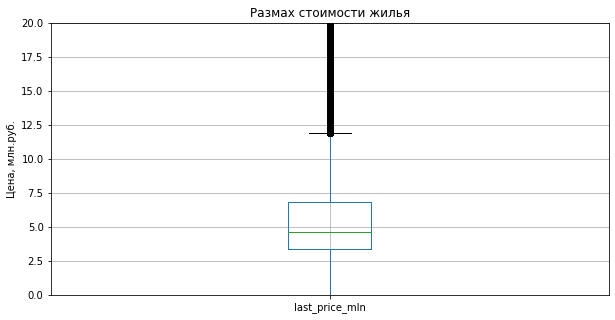

In [33]:
data.boxplot(column='last_price_mln', figsize=(10, 5))
plt.title('Размах стоимости жилья')
plt.ylim(0, 20)
plt.ylabel('Цена, млн.руб.')
plt.show()

Распределение стоимости в диапазоне цен до 20 млн. руб. на диаграмме ниже:

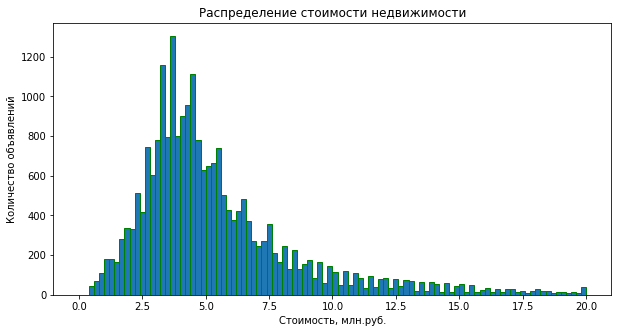

In [34]:
data['last_price_mln'].sort_values().plot(y = 'last_price_mln', kind = 'hist', bins = 100, range=(0, 20), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость, млн.руб.')
plt.ylabel('Количество объявлений')
plt.show()

Удалим аномалии из данных - стоимость до 400тыс.руб и более 300млн.руб

In [35]:
data = data.query('300000000 >= last_price >= 400000', engine='python')

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наблюдается картина нормального распределения
- есть аномалии (до 400тыс.руб.), которые нужно отбросить
- значение стоимости жилья в 763 млн.руб вероятно, что аномалия, отбросим значения выше 300млн.руб.

### 2.4.2 Высота потолков ceiling_height 

Проведем анализ колонки **ceiling_height** - высоты потолков. Посмотрим на статистические данные

In [36]:
data['ceiling_height'].describe().apply("{0:.2f}".format)

count    14487.00
mean         2.77
std          1.26
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: object

Высота потолка имеет явные выбросы - минимальная высота составляет всего 1 м, а максимальная 100 м. Основная доля в диапазоне от 2.52 м до 2.65 м. Всё что ниже 2.4 м  и выше 5м будем считать выбросом.
<br>
<br> Для общей наглядности вначале построим диаграмму размаха в диапазоне от 2.4м до 5м

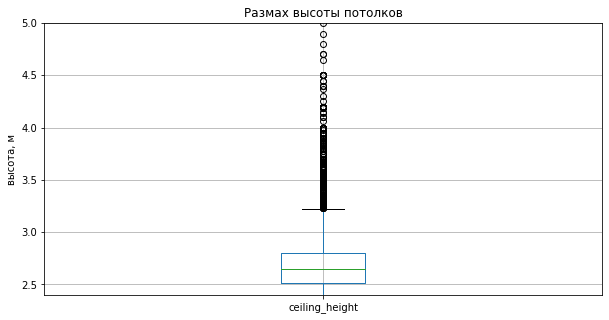

In [37]:
data.boxplot(column='ceiling_height', figsize=(10, 5))
plt.title('Размах высоты потолков')
plt.ylim(2.4, 5)
plt.ylabel('высота, м')
plt.show()

Распределение высоты потолков в диапазоне от 2.4м до 5м на диаграмме ниже:

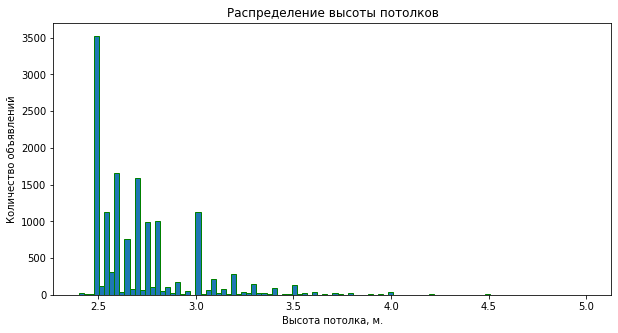

In [38]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 100, range=(2.4, 5), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество объявлений')
plt.show()

Перед тем как отфильтровать выбросы с аномальными высотами потолков, проведем земену пропусков на медианное значение равное 2.65 м.

In [39]:
data["ceiling_height"]= data["ceiling_height"].fillna(2.65)

Оставим в строках только данные с высотой потолков от 2,4 до 5 метров

In [40]:
data = data.query('2.4 <= ceiling_height <= 5', engine='python')

Проверим датасет после чистки

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23588 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23588 non-null  int64         
 1   last_price            23588 non-null  int64         
 2   total_area            23588 non-null  float64       
 3   first_day_exposition  23588 non-null  datetime64[ns]
 4   rooms                 23588 non-null  int64         
 5   ceiling_height        23588 non-null  float64       
 6   floors_total          23588 non-null  float64       
 7   living_area           23588 non-null  float64       
 8   floor                 23588 non-null  int64         
 9   is_apartment          23588 non-null  bool          
 10  studio                23588 non-null  bool          
 11  open_plan             23588 non-null  bool          
 12  kitchen_area          23588 non-null  float64       
 13  balcony         

In [42]:
data['ceiling_height'].describe().apply("{0:.2f}".format)

count    23588.00
mean         2.70
std          0.21
min          2.40
25%          2.60
50%          2.65
75%          2.70
max          5.00
Name: ceiling_height, dtype: object

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- есть аномальные значения (менее 2.4м и более 5м), которые необходимо исключить при расчетах с участием высоты потолков
- наблюдаются значения стандартных высот потолков на отметках: 2.5, 2.6, 2.7, 2.8, 3, 3.5, 4 метров
- наиболее часто встречаются потолки с высотой 2.5м, 2.6м, 2.7м и 3м

### 2.4.3 Количество этажей в доме floors_total

Проведем анализ колонки **floors_total** - количество этажей в доме. Посмотрим на статистические данные

In [43]:
data['floors_total'].describe().apply("{0:.2f}".format)

count    23588.00
mean        10.68
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: object

В данном столбце есть аномалии. Двухэтажные дома - это нормальное явление, а вот 60 этажей  в домах России - сомнительно. Вероятно, что данные являются ошибочными

Для общей наглядности вначале построим диаграмму размаха количества этажей в доме в диапазоне от 2 до 60

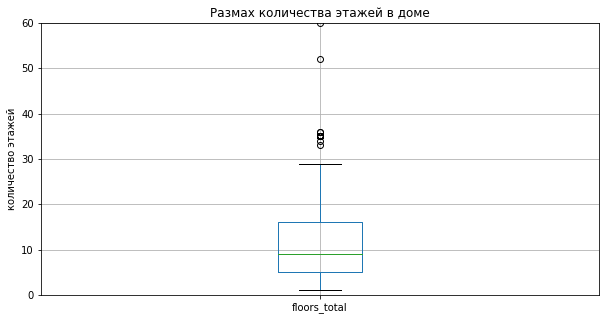

In [44]:
data.boxplot(column='floors_total', figsize=(10, 5))
plt.title('Размах количества этажей в доме')
plt.ylim(0, 60)
plt.ylabel('количество этажей')
plt.show()

Распределение количества этажей в доме в диапазоне от 2 до 60 на диаграмме ниже:

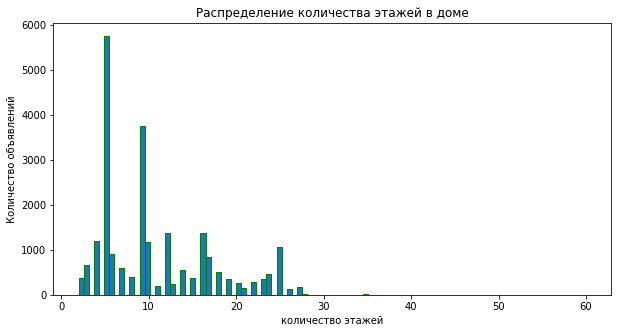

In [45]:
data['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 100, range=(2, 60), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение количества этажей в доме')
plt.xlabel('количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

Выше 30 этажей в доме практически не встречается, поэтому удалим эти аномальные строки

In [46]:
data = data.query('floors_total <= 30', engine='python')

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- есть аномальные значения - более 30 этажей в доме, которые необходимо исключить
- чаще всего встречаются дома этажностью 5, 9, 16 и 25 этажей

### 2.4.4 Жилая площадь living_area

Проведем анализ колонки **living_area** - жилая площадь. Посмотрим на статистические данные

In [47]:
data['living_area'].describe().apply("{0:.2f}".format)

count    23558.00
mean        34.52
std         22.08
min          2.00
25%         19.00
50%         30.00
75%         42.10
max        409.00
Name: living_area, dtype: object

В данном столбце есть аномалии. Если по максимальному значению в 410 м² возможно, такие объекты недвижимости можно встретить, то с минимальной площадью в размере 2 м² очевидно, что данные являются ошибочными

Построим диаграмму размаха в диапазоне от 2 м² до 200 м²

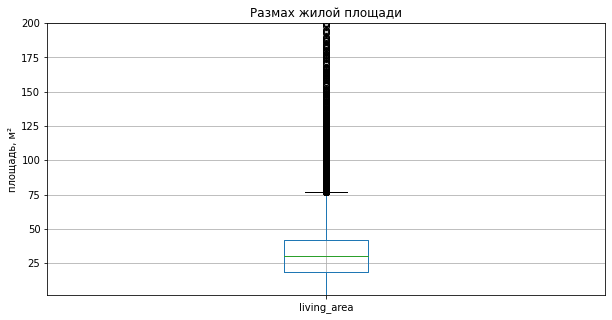

In [48]:
data.boxplot(column='living_area', figsize=(10, 5))
plt.title('Размах жилой площади')
plt.ylim(2, 200)
plt.ylabel('площадь, м²')
plt.show()

Распределение жилой площади в диапазоне от 2 м² до 200 м² на диаграмме ниже:

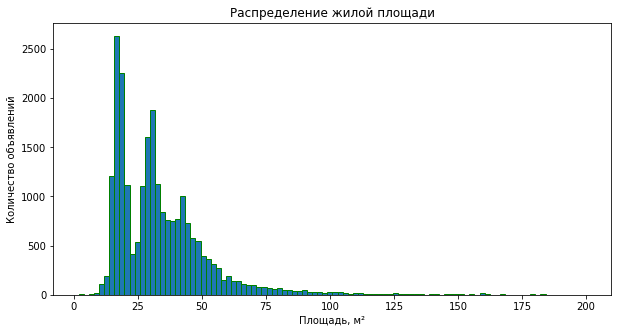

In [49]:
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 100, range=(2, 200), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

Сужая диапазон значений на графике, можно выявить наиболее популярные объвления

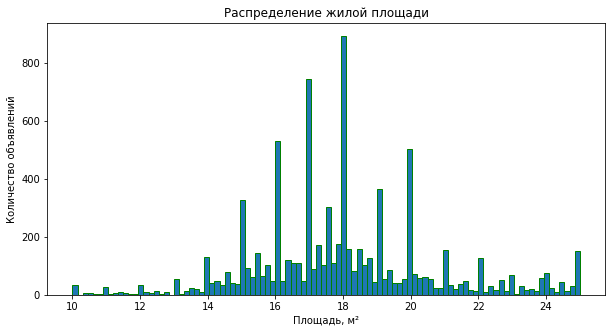

In [50]:
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 100, range=(10, 25), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

Удалим строки в которых жилая площадь менее 10 м²

In [51]:
data = data.query('living_area >= 10', engine='python')

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- есть квартиры с аномальной жилой площадью - менее 10 м², такие строки надо удалить
- по распределению жилой площади наблюдается три "горба" на значениях 18, 30 и 43 м², возможно, это свидетельствует о количестве комнат в квартире, 1, 2, 3-х комнтатные квартиры
- наибольшей количество объявлений однокомнатных квартир, чаще всего  попадаются квартиры с жилой площадью  17, 18 и 20 м²
- из двухкомнатных квартир чаще всего  попадаются квартиры с жилой площадью  30, 28 и 31 м²

### 2.4.5 Площадь кухни kitchen_area 

Проведем анализ колонки **kitchen_area** - площадь кухни. Посмотрим на статистические данные

In [52]:
data['kitchen_area'].describe().apply("{0:.2f}".format)

count    23527.00
mean        10.47
std          5.94
min          1.30
25%          7.00
50%          9.00
75%         12.00
max        107.00
Name: kitchen_area, dtype: object

В данном столбце есть аномалии. Если по максимальному значению в 112 м² возможно, такие площадь кухни можно встретить, то с минимальной площадью в размере 1.3 м² очевидно, что данные являются ошибочными

Построим диаграмму размаха в диапазоне от 1 м² до 115 м²

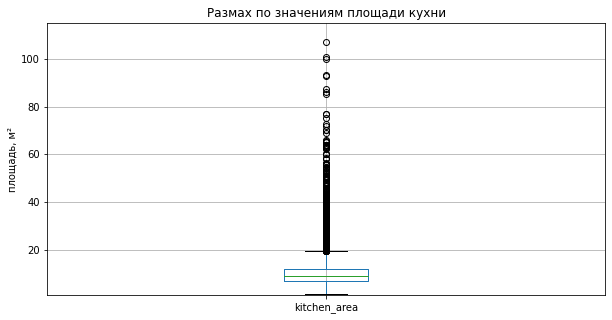

In [53]:
data.boxplot(column='kitchen_area', figsize=(10, 5))
plt.title('Размах по значениям площади кухни')
plt.ylim(1, 115)
plt.ylabel('площадь, м²')
plt.show()

Распределение жилой площади в диапазоне от 1 м² до 115 м² на диаграмме ниже:

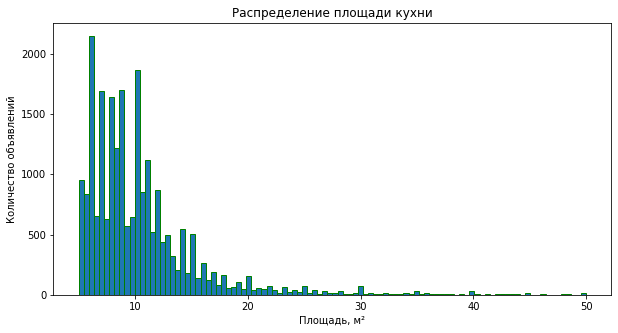

In [54]:
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 100, range=(5, 50), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

Удалим строки в которых площадь кухни менее 4 м²

In [55]:
data = data.query('kitchen_area >= 4', engine='python')

Проверим, есть ли квартиры, в которых сумма жилой площади и кухни быть выше общей:

In [56]:
 data[['total_area', 'living_area', 'kitchen_area']].query('total_area < living_area + kitchen_area')

,total_area,living_area,kitchen_area
184,30.20,26.10,6.200000
424,98.00,88.00,16.896552
440,27.11,24.75,4.674138
545,23.80,20.00,5.000000
551,31.59,30.55,9.280000
...,...,...,...
22095,36.50,33.20,6.293103
22246,27.30,23.30,4.706897
22907,228.00,200.00,39.310345
23102,66.00,55.50,11.379310


В датасете некорректных объявлений 104 шт. Исправим такие объявления, добавим разницу общей площади от суммы кухни + жилая площадь

In [57]:
# пройдемся по строкам, исправим площадь функцией
for i in data[['total_area', 'living_area', 'kitchen_area']].query(
    'total_area < living_area + kitchen_area').index:
     data.loc[i, 'total_area'] = data.loc[i, 'living_area'] + data.loc[i, 'kitchen_area']

# проверим результат повторно
data[['total_area', 'living_area', 'kitchen_area']].query('total_area < living_area + kitchen_area')

,total_area,living_area,kitchen_area


Результат пустой, значит исправление прошло успешно

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- площадь кухни менее 4 м² и более 50 м² будем считать выбросом, в дальнейших расчетах такие значения необходимо исключить
- чаще всего встречаются кухни с площадью 10, 6 и 9 м²
- наиболее частые значения площади - четные числа
- найдены некорректные объявления (104шт) в которых сумма площади кухни и жилой больше чем общая площаь, эта разница исправлена 

<div style='border:solid blue 2px; padding: 20px'>

### Выводы по аномалиям значений по столбцам:
- наблюдается картина нормального распределения стоимости жилья (last_price)
- есть незначительные аномалии стоимости жилья (до 400тыс.руб.), строки которых были удалены
    
- есть аномальные значения высота потолков ceiling_height (менее 2.4м и более 5м), строки которых были удалены
- наблюдаются значения стандартных высот потолков на отметках: 2.5, 2.6, 2.7, 2.8, 3, 3.5, 4 метров
- наиболее часто встречаются потолки с высотой 2.5м, 2.6м, 2.7м и 3м
    
-  есть аномальные значения - более 30 этажей в доме, строки с количеством этажей более 30 были удалены
- чаще всего встречаются дома этажностью 5, 9, 16 и 25

- есть квартиры с аномальной жилой площадью - менее 10 м², такие строки были удалены
- по распределению жилой площади наблюдается три "горба" на значениях 18, 30 и 43 м², возможно, это свидетельствует о количестве комнат в квартире, 1, 2, 3-х комнтатные квартиры
- наибольшей количество объявлений однокомнатных квартир, чаще всего  попадаются квартиры с жилой площадью  17, 18 и 20 м²
- из двухкомнатных квартир чаще всего  попадаются квартиры с жилой площадью  30, 28 и 31 м²
    
-  площадь кухни менее 4 м² и более 50 м², такие строки были удалены
- чаще всего встречаются кухни с площадью 10, 6 и 9 м²
- наиболее частые значения площади кухни - четные числа
- найдены некорректные объявления (104шт) в которых сумма площади кухни и жилой больше чем общая площаь, эта разница исправлена 

# 3. Добавление новых столбцов в таблицу 

## 3.1 Стоимость квадратного метра 

In [58]:
# Добавление столбца с ценой за 1м²
data['price_one_square_meter'] = data['last_price'] / data['total_area']

# Округлим полученную цену до рубля
data['price_one_square_meter'] = data['price_one_square_meter'].round(0)

# Проверим результат
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,санкт-петербург,18863,16028,1,482.0,2,755.0,0,13.000,120370.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,посёлок шушары,12817,18603,0,NaN,0,NaN,81,3.350,82921.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,санкт-петербург,21741,13933,1,90.0,2,574.0,558,5.196,92786.0


## 3.2 Учет даты публикации объявления

Добавим три календарных столбца: с  днем недели, месяцем и годом публикации объявления

In [59]:
# Добавление столбца с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавление столбца  с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавление столбца  с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Проверим результат
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,0,13.000,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81,3.350,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558,5.196,92786.0,3,8,2015


## 3.3 Учет этажа жилья в доме

Добавим столбец с категоризацие по этажам floor_category

In [60]:
# Функция распределения жилья по категориям в зависимости от этажа в доме
def func_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# Добавление столбца  с категорией этажа квартиры
data['floor_category'] = data.apply(func_floor_category, axis=1)

# Проверим результат
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,0,13.000,120370.0,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81,3.350,82921.0,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558,5.196,92786.0,3,8,2015,другой


## 3.4 Расстояние до центра населенного пункта

Добавим в таблицу столбец **city_centers_nearest_km**, значения запишем в километрах, округлим до целого числа

In [61]:
# Добавление столбца с расстоянием до центра
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

# Проверим результат
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,0,13.000,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,3.350,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,5.196,92786.0,3,8,2015,другой,14.0


<div style='border:solid blue 2px; padding: 20px'>

### Выводы по разделу добавления новых столбцов
В таблицу добавлены новые столбцы для дальнейшего анализа:
    
- Стоимость квадратного метра **price_one_square_meter**
- Три колонки для учета даты публикации объявления: **exposition_weekday, exposition_month, exposition_year
- Учет этажа жилья в доме **floor_category**
- Расстояние до центра населенного пункта **city_centers_nearest_km**

# 4. Исследовательский анализ данных

## 4.1 Изучение параметров объектов

### 4.1.1 Общая площадь

In [62]:
# Статистические данные для этого столбца
data['total_area'].describe().apply("{0:.2f}".format)

count    23424.00
mean        60.45
std         34.99
min         20.00
25%         40.00
50%         52.00
75%         70.00
max        631.20
Name: total_area, dtype: object

Построим диаграмму размаха в полном диапазоне

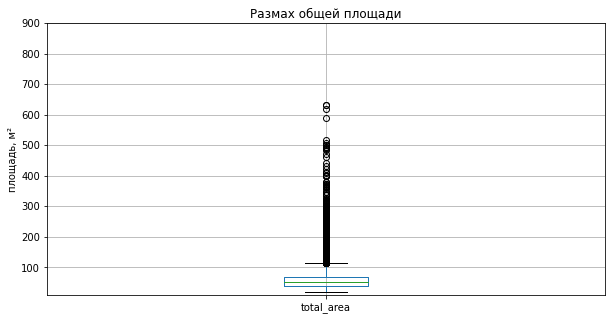

In [63]:
data.boxplot(column='total_area', figsize=(10, 5))
plt.title('Размах общей площади')
plt.ylim(10, 900)
plt.ylabel('площадь, м²')
plt.show()

Значения менее 20 м² и более 250 м² будем считать выбросом. Распределение общей площади построим на диаграмме ниже:

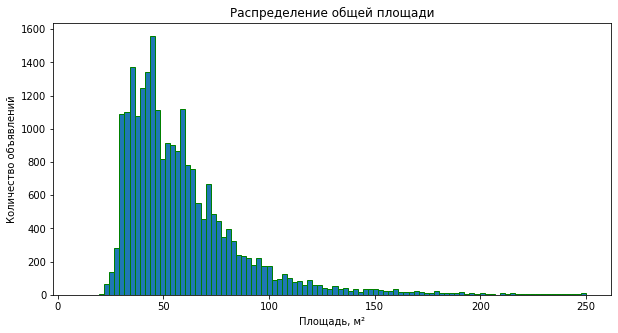

In [64]:
data['total_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 100, range=(10, 250), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение общей площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основные значения общей площади располагаются в диапазоне от 30 м²  до 80 м²
- наиболее востребаванные квартиры площадью 32 м², 45 м² и 60 м²
- основные статистически показатели: медиана = 54 м², среднее = 60.45 м², Q1 = 40 м², Q3 = 70 м²

### 4.1.2 Жилая площадь

Проведем анализ данных после удаления из таблицы выбросов, выполненные в п. 2.4 Аномалии значений по столбцам

In [65]:
# Статистические данные для этого столбца
data['living_area'].describe().apply("{0:.2f}".format)

count    23424.00
mean        34.64
std         22.08
min         10.00
25%         19.00
50%         30.00
75%         42.20
max        409.00
Name: living_area, dtype: object

Построим диаграмму размаха в полном диапазоне

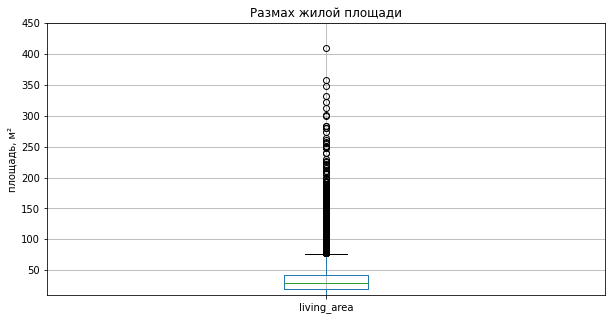

In [66]:
data.boxplot(column='living_area', figsize=(10, 5))
plt.title('Размах жилой площади')
plt.ylim(10, 450)
plt.ylabel('площадь, м²')
plt.show()

Значения менее 20 м² и более 250 м² будем считать выбросом. Распределение общей площади построим на диаграмме ниже в диапазоне от 10 до 120  м², так как вне этого диапазона значений мало:

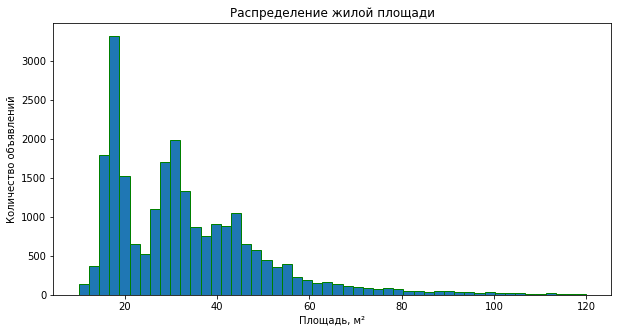

In [67]:
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 50, range=(10, 120), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основные значения общей площади располагаются в диапазоне от 17 м²  до 50 м²
- наиболее востребаванные квартиры жилой площадью 18 м², 30 м² и 43 м²
- основные статистически показатели: медиана = 30 м², среднее = 34.64 м², Q1 = 19 м², Q3 = 42.2 м²

### 4.1.3 Площадь кухни

Проведем анализ данных после удаления из таблицы выбросов, выполненные в п. 2.4 Аномалии значений по столбцам

In [68]:
# Статистические данные для этого столбца
data['kitchen_area'].describe().apply("{0:.2f}".format)

count    23424.00
mean        10.50
std          5.94
min          4.00
25%          7.00
50%          9.00
75%         12.00
max        107.00
Name: kitchen_area, dtype: object

Построим диаграмму размаха в полном диапазоне

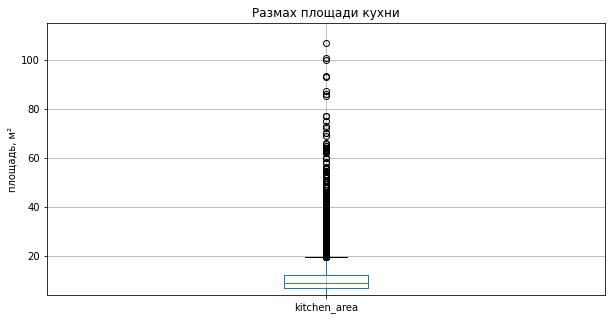

In [69]:
data.boxplot(column='kitchen_area', figsize=(10, 5))
plt.title('Размах площади кухни')
plt.ylim(4, 115)
plt.ylabel('площадь, м²')
plt.show()

Значения менее 4 м² и более 30 м² будем считать выбросом. Распределение общей площади построим на диаграмме ниже в диапазоне от 4 до 40 м², так как вне этого диапазона значений мало:

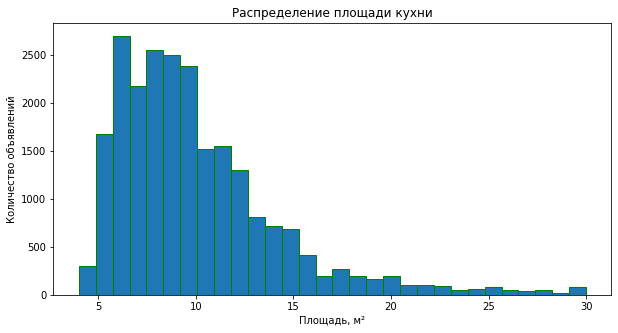

In [70]:
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 30, range=(4, 30), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основные значения общей площади располагаются в диапазоне от 6 м²  до 10 м²
- основные статистически показатели: медиана = 9 м², среднее = 10.5 м², Q1 = 7 м², Q3 = 12 м²

### 4.1.4 Цена объекта

После фильтрации аномальных значений по разным столбцам изменились и значения стоимости. Проведем анализ

In [71]:
# Статистические данные для этого столбца
data['last_price'].describe().apply("{0:.2f}".format)

count        23424.00
mean       6466579.34
std        8657373.31
min         430000.00
25%        3450000.00
50%        4650000.00
75%        6800000.00
max      300000000.00
Name: last_price, dtype: object

Построим диаграмму размаха в полном диапазоне

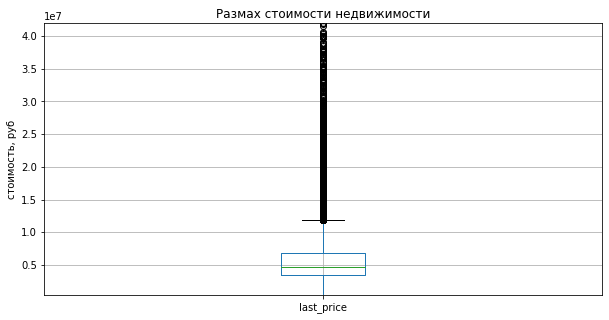

In [72]:
data.boxplot(column='last_price', figsize=(10, 5))
plt.title('Размах стоимости недвижимости')
plt.ylim(400000, 42000000)
plt.ylabel('стоимость, руб')
plt.show()

Значения менее 400 000 руб. и более 30 млн. руб. будем считать выбросом. Построим диаграмму распределения стоимости

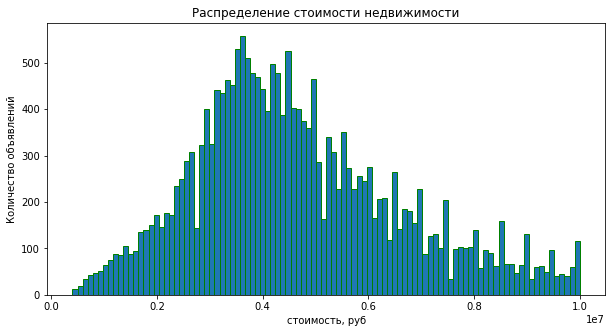

In [73]:
data['last_price'].sort_values().plot(y = 'last_price', kind = 'hist', bins = 100, range=(400000, 10000000), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('стоимость, руб')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- значения стоимости недвижимости приобретают нормальное распределение
- основные значения располагаются в диапазоне от 2 млн. руб до 10 млн.руб.
- наиболее востребаванные диапазон стоимости недвижимости 3-5 млн. руб.
- основные статистически показатели: медиана = 4.65млн. руб., среднее = 6.46 млн. руб, Q1 = 3.45 млн. руб, Q3 = 6.8 млн. руб

### 4.1.5 Количество комнат

После фильтрации аномальных значений по разным столбцам изменились и значения стоимости. Проведем анализ

In [74]:
# Статистические данные для этого столбца
data['rooms'].describe().apply("{0:.2f}".format)

count    23424.00
mean         2.08
std          1.07
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: object

Построим диаграмму размаха в полном диапазоне

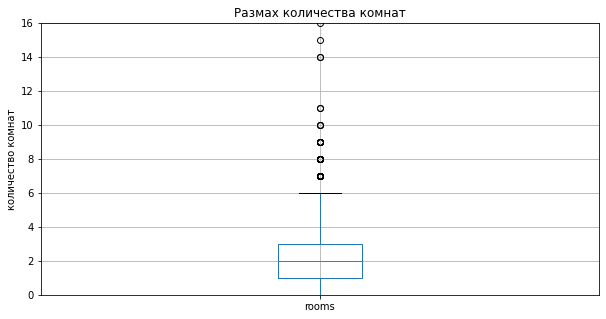

In [75]:
data.boxplot(column='rooms', figsize=(10, 5))
plt.title('Размах количества комнат')
plt.ylim(0, 16)
plt.ylabel('количество комнат')
plt.show()

Значения менее 1  и более 7 будем считать выбросом. Построим диаграмму распределения количества комнат в квартирах

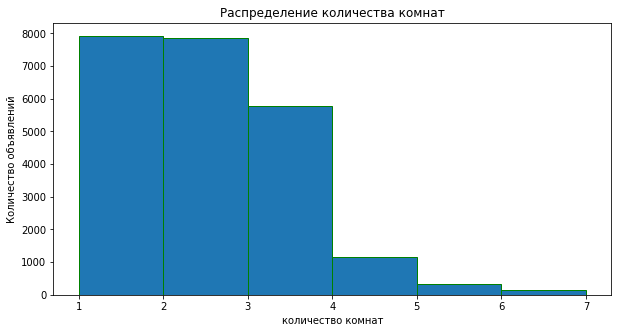

In [76]:
data['rooms'].sort_values().plot(y = 'rooms', kind = 'hist', bins = 6, range=(1, 7), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- значения стоимости недвижимости приобретают нормальное распределение
- основные значения располагаются в диапазоне от 1 до 4 комнат
- наиболее востребаванные одно-, двух- и трехкомнатные квартиры
- основные статистически показатели: медиана = 2, среднее = 2.08, Q1 = 1, Q3 = 3

### 4.1.6 Высота потолков

После фильтрации аномальных значений по разным столбцам изменились и значения стоимости. Проведем анализ

In [77]:
# Статистические данные для этого столбца
data['ceiling_height'].describe().apply("{0:.2f}".format)

count    23424.00
mean         2.70
std          0.22
min          2.40
25%          2.60
50%          2.65
75%          2.70
max          5.00
Name: ceiling_height, dtype: object

Построим диаграмму размаха в полном диапазоне

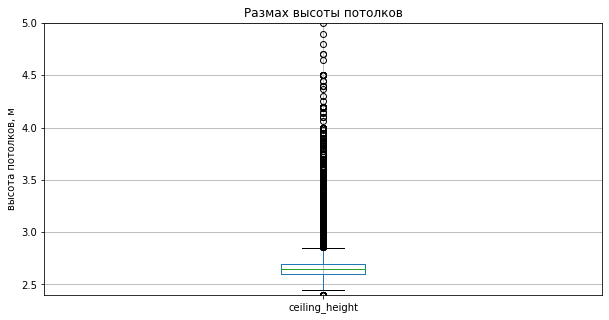

In [78]:
data.boxplot(column='ceiling_height', figsize=(10, 5))
plt.title('Размах высоты потолков')
plt.ylim(2.4, 5)
plt.ylabel('высота потолков, м')
plt.show()

Значения менее 2.4 м и более 4 м будем считать выбросом. Построим диаграмму распределения высоты потолков в квартирах

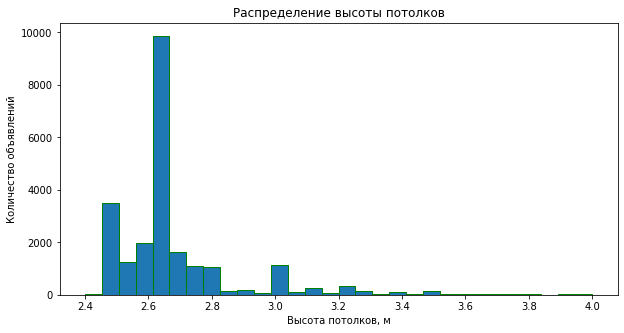

In [79]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2.4, 4), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основные значения располагаются в диапазоне от 2.5 м до 2.8 м
- наиболее часто встречаются квартиры с высотой потолков 2.5 м
- основные статистически показатели: медиана = 2.65 м, среднее = 2.7 м, Q1 = 2.6 м, Q3 = 2.7 м

### 4.1.7 Этаж квартиры

После фильтрации аномальных значений по разным столбцам изменились и значения стоимости. Проведем анализ

In [80]:
# Статистические данные для этого столбца
data['floor'].describe().apply("{0:.2f}".format)

count    23424.00
mean         5.87
std          4.84
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: object

Построим диаграмму размаха в полном диапазоне

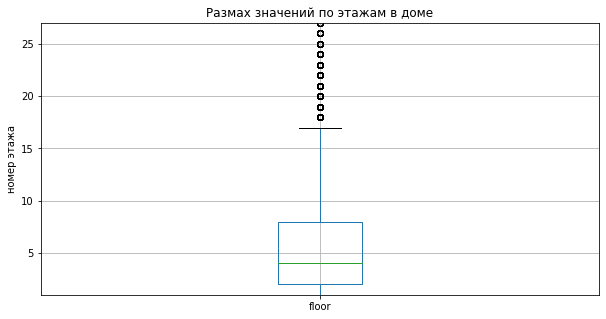

In [81]:
data.boxplot(column='floor', figsize=(10, 5))
plt.title('Размах значений по этажам в доме')
plt.ylim(1, 27)
plt.ylabel('номер этажа')
plt.show()

Значения более 27 были удалены в результате фильтрации. Построим диаграмму распределения высоты потолков в квартирах

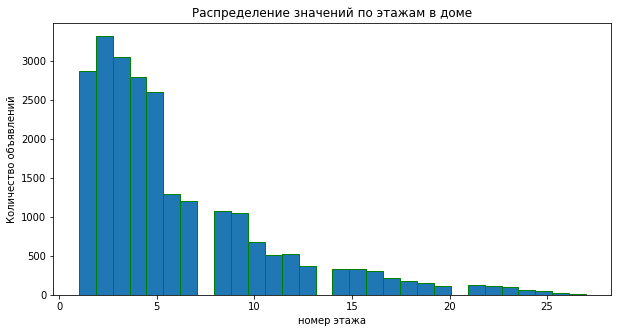

In [82]:
data['floor'].sort_values().plot(y = 'floor', kind = 'hist', bins = 30, range=(1, 27), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений по этажам в доме')
plt.xlabel('номер этажа')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наблюдаются пробелы в данных ввиду заданного диапазона. В другом диапазоне значений таких пробелов нет
- основные значения располагаются в диапазоне от 1 до 9 этажей
- наиболее часто встречаются квартиры 1-5 этажах
- основные статистически показатели: медиана = 4, среднее = 5.87, Q1 = 2, Q3 = 8

### 4.1.8 Тип этажа квартиры

Проведем анализ добавленной колонки - с категоризацией по этажам **floor_category**

In [83]:
# Статистические данные для этого столбца
data['floor_category'].describe().T

count      23424
unique         3
top       другой
freq       17165
Name: floor_category, dtype: object

In [84]:
# Применим еще один формат отображения данных по столбцу, посмотрим на количество значений в каждой категории
data['floor_category'].value_counts()

другой       17165
последний     3383
первый        2876
Name: floor_category, dtype: int64

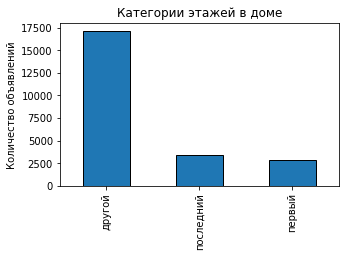

In [85]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=False)
plt.title('Категории этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- бОльшая часть объявлений - квартиры не на крайних этажах (категория "другой")
- первый и последний этаж примерно в равной доли

### 4.1.9 Общее количество этажей в доме

In [86]:
# Статистические данные для этого столбца
data['floors_total'].describe().apply("{0:.2f}".format)

count    23424.00
mean        10.63
std          6.52
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: object

Построим диаграмму размаха в полном диапазоне

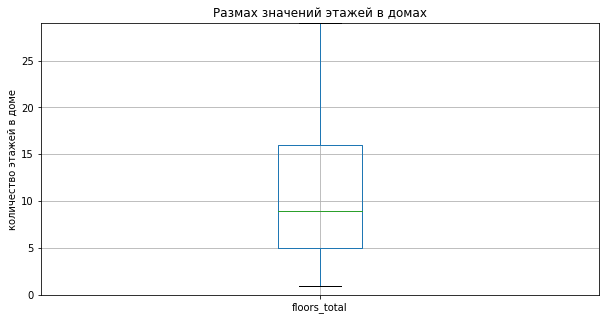

In [87]:
data.boxplot(column='floors_total', figsize=(10, 5))
plt.title('Размах значений этажей в домах')
plt.ylim(0, 29)
plt.ylabel('количество этажей в доме')
plt.show()

Значения более 29 были удалены в результате фильтрации. Построим диаграмму распределения количества этажей в домах

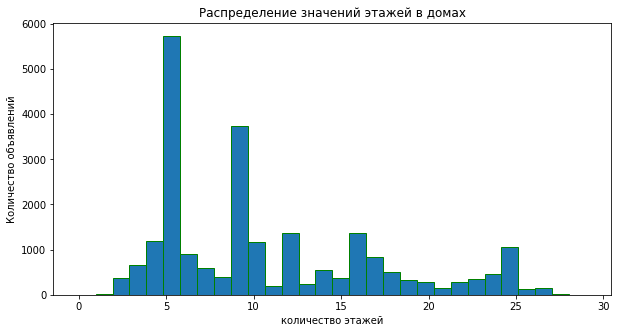

In [88]:
data['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 30, range=(0, 29), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений этажей в домах')
plt.xlabel('количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- есть явно выделяющиеся дома с количеством этажей 5, 9, 16, 25 этажей
- наиболее часто встречаются дома с количеством этажей 4 и 9
- основные статистически показатели: медиана = 9, среднее = 10.63, Q1 = 5, Q3 = 16

### 4.1.10 Расстояние до центра города в метрах

In [89]:
# Статистические данные для этого столбца
data['city_centers_nearest'].describe().apply("{0:.2f}".format)

count    23424.00
mean     10905.69
std       9635.98
min          0.00
25%       2288.75
50%      11270.00
75%      15247.00
max      65968.00
Name: city_centers_nearest, dtype: object

Построим диаграмму размаха в полном диапазоне

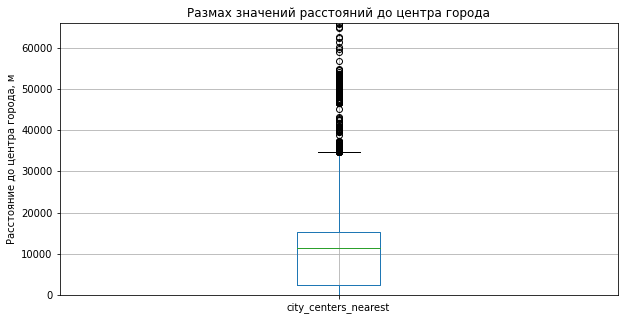

In [90]:
data.boxplot(column='city_centers_nearest', figsize=(10, 5))
plt.title('Размах значений расстояний до центра города')
plt.ylim(0, 66000)
plt.ylabel('Расстояние до центра города, м')
plt.show()

Расстояние более 36 км будем считать выбросом, также не будем учитывать нулевые значения, которыми были заполнены пустые строки. Построим диаграмму распределения расстояния до центра города в метрах в диапазоне от 1 м до 36 км

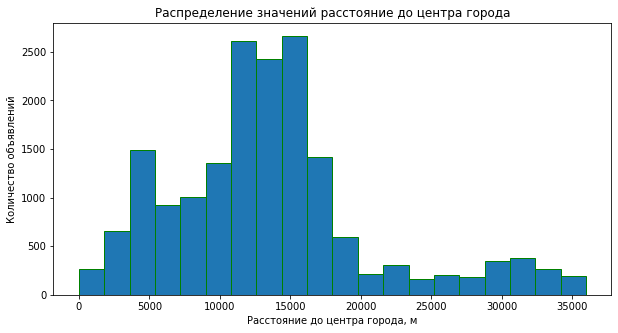

In [91]:
data['city_centers_nearest'].sort_values().plot(y = 'city_centers_nearest', kind = 'hist', bins = 20, range=(1, 36000), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений расстояние до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основной диапазон расстояний от 5 км до 16 км
- наиболее часто квартиры располагаются на расстоянии 11-16 км от центра населенного пункта
- основные статистически показатели: медиана = 11.27 км, среднее = 10.9 км, Q1 = 2.3 км, Q3 = 15.3 км

### 4.1.11 Расстояние до ближайшего аэропорта

In [92]:
# Статистические данные для этого столбца
data['airports_nearest'].describe().apply("{0:.2f}".format)

count    23424.00
mean     22115.88
std      16474.09
min          0.00
25%      10275.00
50%      21925.50
75%      34491.25
max      84869.00
Name: airports_nearest, dtype: object

Построим диаграмму размаха в полном диапазоне

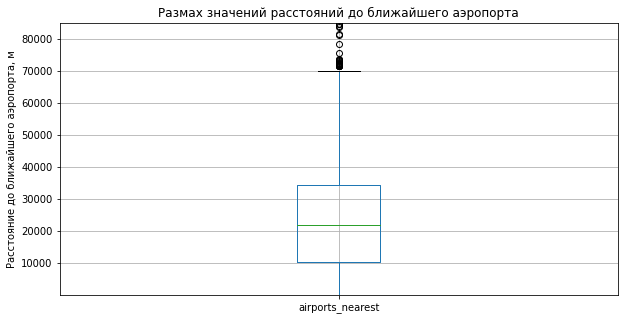

In [93]:
data.boxplot(column='airports_nearest', figsize=(10, 5))
plt.title('Размах значений расстояний до ближайшего аэропорта')
plt.ylim(1, 85000)
plt.ylabel('Расстояние до ближайшего аэропорта, м')
plt.show()

Расстояние более 85 км будем считать выбросом, также не будем учитывать нулевые значения, которыми были заполнены пустые строки. Построим диаграмму распределения расстояния до аэропорта в метрах в диапазоне от 1 м до 85 км

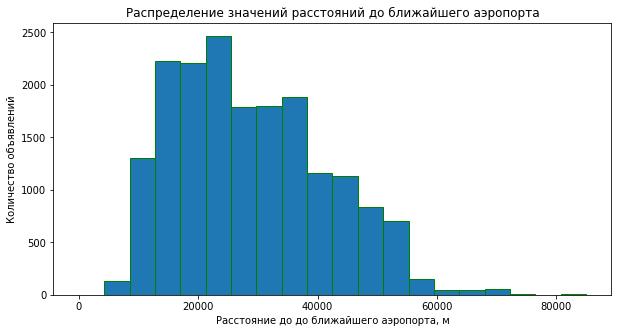

In [94]:
data['airports_nearest'].sort_values().plot(y = 'airports_nearest', kind = 'hist', bins = 20, range=(1, 85000), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений расстояний до ближайшего аэропорта')
plt.xlabel('Расстояние до до ближайшего аэропорта, м')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- основной диапазон расстояний от 8 км до 50 км
- наиболее часто квартиры располагаются на расстоянии 12-38 км от аэропорта
- основные статистически показатели: медиана = 21.9 км, среднее = 22.1 км, Q1 = 10.3 км, Q3 = 34.5 км
- медиана близка к среднему значению

### 4.1.12 Расстояние до ближайшего парка

In [95]:
# Статистические данные для этого столбца
data['parks_nearest'].describe().apply("{0:.2f}".format)

count    8002.00
mean      490.76
std       342.83
min         1.00
25%       287.00
50%       454.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: object

Построим диаграмму размаха в полном диапазоне

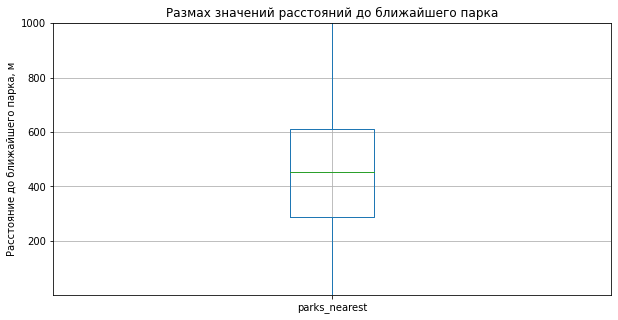

In [96]:
data.boxplot(column='parks_nearest', figsize=(10, 5))
plt.title('Размах значений расстояний до ближайшего парка')
plt.ylim(1, 1000)
plt.ylabel('Расстояние до ближайшего парка, м')
plt.show()

Расстояние более 1600 м будем считать выбросом, также не будем учитывать нулевые значения, которыми были заполнены пустые строки. Построим диаграмму распределения расстояния до аэропорта в метрах в диапазоне от 1 м до 1600 м

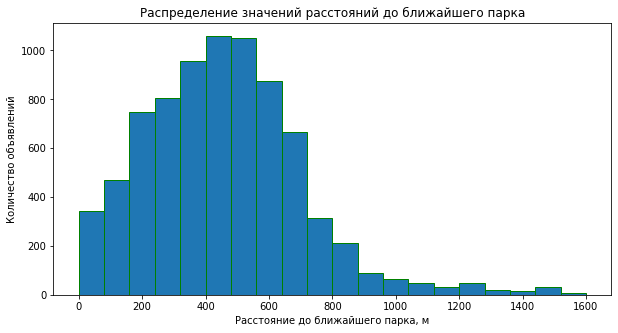

In [97]:
data['parks_nearest'].sort_values().plot(y = 'parks_nearest', kind = 'hist', bins = 20, range=(0, 1600), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений расстояний до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наблюдается нормальное распределение расстояний
- основной диапазон расстояний до ближайшего парка от 50 м до 750 м
- наиболее часто квартиры располагаются на расстоянии 400-500 м до ближайшего парка
- основные статистически показатели: медиана = 454 м, среднее = 490 м, Q1 = 387 м, Q3 = 612 м
- медиана близка к среднему значению

### 4.1.13 День и месяц публикации объявления

#### День публикации объявления

In [98]:
# Статистические данные для этого столбца
data['exposition_weekday'].describe().apply("{0:.2f}".format)

count    23424.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: exposition_weekday, dtype: object

Построим диаграмму размаха в полном диапазоне

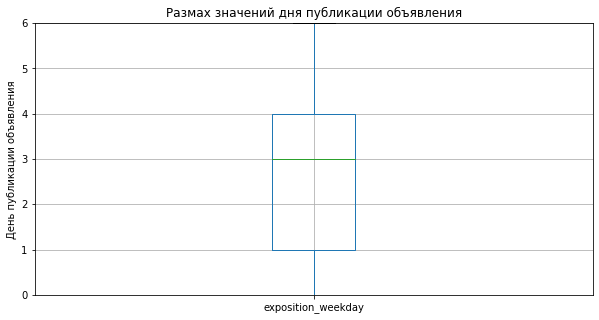

In [99]:
data.boxplot(column='exposition_weekday', figsize=(10, 5))
plt.title('Размах значений дня публикации объявления')
plt.ylim(0, 6)
plt.ylabel('День публикации объявления')
plt.show()

Построим диаграмму распределения дня публикации объявления

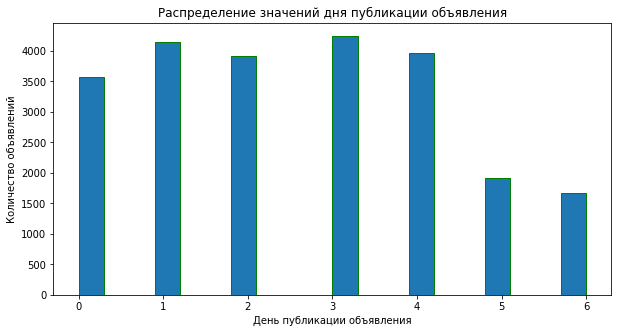

In [100]:
data['exposition_weekday'].sort_values().plot(y = 'exposition_weekday', kind = 'hist', bins = 20, range=(0, 6), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений дня публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы по дням неделям:**
- наибольшая активность появления объявления выпадает на будние дни, чаще всего вторник и четверг
- на выходных выкладывают вдвое меньше объявлений
- основные статистически показатели: медиана = 3, среднее = 2.57, Q1 = 1, Q3 = 4

#### Месяц публикации объявления

In [101]:
# Статистические данные для этого столбца
data['exposition_month'].describe().apply("{0:.2f}".format)

count    23424.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: exposition_month, dtype: object

Построим диаграмму размаха в полном диапазоне

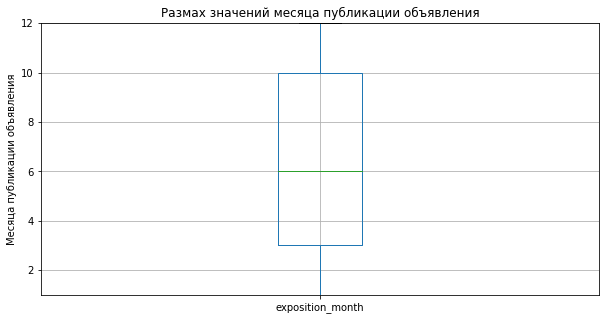

In [102]:
data.boxplot(column='exposition_month', figsize=(10, 5))
plt.title('Размах значений месяца публикации объявления')
plt.ylim(1, 12)
plt.ylabel('Месяца публикации объявления')
plt.show()

Построим диаграмму распределения дня публикации объявления

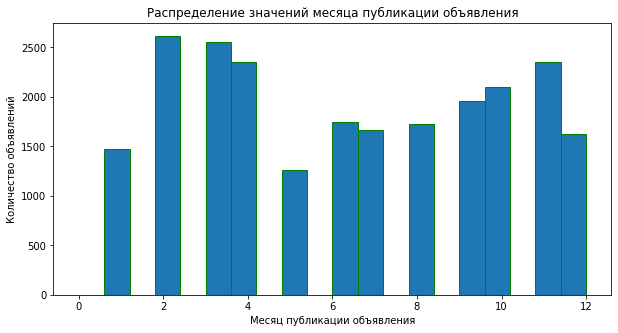

In [103]:
data['exposition_month'].sort_values().plot(y = 'exposition_month', kind = 'hist', bins = 20, range=(0, 12), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений месяца публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы по месяцам:**
- наибольшая активность в продажах наблюдается с февраля по апрель, а также в октябре и ноябре
- минимум продаж приходится на май
- основные статистически показатели: медиана = 6, среднее = 6.4, Q1 = 3, Q3 = 10

<div style='border:solid blue 2px; padding: 20px'>

### Выводы по параметрам объектов
4.1.1 Общая площадь
- основные значения общей площади располагаются в диапазоне от 30 м²  до 80 м²
- наиболее востребаванные квартиры площадью 32 м², 45 м² и 60 м²
- основные статистически показатели: медиана = 54 м², среднее = 60.45 м², Q1 = 40 м², Q3 = 70 м²


4.1.2 Жилая площадь
- основные значения общей площади располагаются в диапазоне от 17 м²  до 50 м²
- наиболее востребаванные квартиры жилой площадью 18 м², 30 м² и 43 м²
- основные статистически показатели: медиана = 30 м², среднее = 34.64 м², Q1 = 19 м², Q3 = 42.2 м²


4.1.3 Площадь кухни
- основные значения общей площади располагаются в диапазоне от 6 м²  до 10 м²
- основные статистически показатели: медиана = 9 м², среднее = 10.5 м², Q1 = 7 м², Q3 = 12 м²

4.1.4 Цена объекта
- значения стоимости недвижимости приобретают нормальное распределение
- основные значения располагаются в диапазоне от 2 млн. руб до 10 млн.руб.
- наиболее востребаванные диапазон стоимости недвижимости 3-5 млн. руб.
- основные статистически показатели: медиана = 4.65млн. руб., среднее = 6.46 млн. руб, Q1 = 3.45 млн. руб, Q3 = 6.8 млн. руб

4.1.5 Количество комнат
- значения стоимости недвижимости приобретают нормальное распределение
- основные значения располагаются в диапазоне от 1 до 4 комнат
- наиболее востребаванные одно-, двух- и трехкомнатные квартиры
- основные статистически показатели: медиана = 2, среднее = 2.08, Q1 = 1, Q3 = 3

4.1.6 Высота потолков
- основные значения располагаются в диапазоне от 2.5 м до 2.8 м
- наиболее часто встречаются квартиры с высотой потолков 2.5 м
- основные статистически показатели: медиана = 2.65 м, среднее = 2.7 м, Q1 = 2.6 м, Q3 = 2.7 м

4.1.7 Этаж квартиры
- наблюдаются пробелы в данных ввиду заданного диапазона. В другом диапазоне значений таких пробелов нет
- основные значения располагаются в диапазоне от 1 до 9 этажей
- наиболее часто встречаются квартиры 1-5 этажах
- основные статистически показатели: медиана = 4, среднее = 5.87, Q1 = 2, Q3 = 8

4.1.8 Тип этажа квартиры
- бОльшая часть объявлений - квартиры не на крайних этажах (категория "другой")
- первый и последний этаж примерно в равной доли

4.1.9 Общее количество этажей в доме
- есть явно выделяющиеся дома с количеством этажей 5, 9, 16, 25 этажей
- наиболее часто встречаются дома с количеством этажей 4 и 9
- основные статистически показатели: медиана = 9, среднее = 10.63, Q1 = 5, Q3 = 16

4.1.10 Расстояние до центра города в метрах
- основной диапазон расстояний от 5 км до 16 км
- наиболее часто квартиры располагаются на расстоянии 11-16 км от центра населенного пункта
- основные статистически показатели: медиана = 11.27 км, среднее = 10.9 км, Q1 = 2.3 км, Q3 = 15.3 км


4.1.11 Расстояние до ближайшего аэропорта
- основной диапазон расстояний от 8 км до 50 км
- наиболее часто квартиры располагаются на расстоянии 12-38 км от аэропорта
- основные статистически показатели: медиана = 21.9 км, среднее = 22.1 км, Q1 = 10.3 км, Q3 = 34.5 км
- медиана близка к среднему значению

4.1.12 Расстояние до ближайшего парка
- наблюдается нормальное распределение расстояний
- основной диапазон расстояний до ближайшего парка от 50 м до 750 м
- наиболее часто квартиры располагаются на расстоянии 400-500 м до ближайшего парка
- основные статистически показатели: медиана = 454 м, среднее = 490 м, Q1 = 387 м, Q3 = 612 м
- медиана близка к среднему значению

4.1.13 День и месяц публикации объявления
- наибольшая активность появления объявления выпадает на будние дни, чаще всего вторник и четверг
- на выходных выкладывают вдвое меньше объявлений
- основные статистически показатели: медиана = 3, среднее = 2.57, Q1 = 1, Q3 = 4
- наибольшая активность в продажах наблюдается с февраля по апрель, а также в октябре и ноябре
- минимум продаж приходится на май
- основные статистически показатели: медиана = 6, среднее = 6.4, Q1 = 3, Q3 = 10

## 4.2 Длительность продажи квартир 

Проведем анализ длительности продаж квартир

In [104]:
# Статистические данные для этого столбца
data['days_exposition'].describe().apply("{0:.2f}".format)

count    23424.00
mean       156.77
std        213.95
min          0.00
25%         22.00
50%         74.00
75%        198.00
max       1580.00
Name: days_exposition, dtype: object

Построим диаграмму размаха в диапазоне от 1 до 500 дней

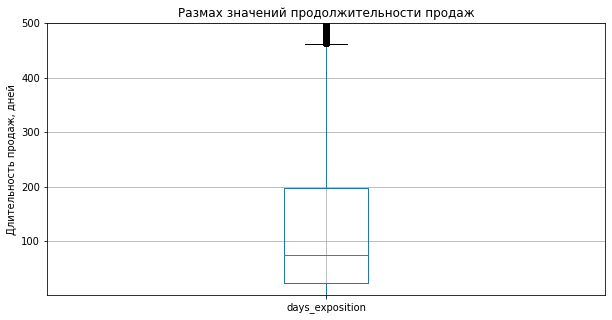

In [105]:
data.boxplot(column='days_exposition', figsize=(10, 5))
plt.title('Размах значений продолжительности продаж')
plt.ylim(1, 500)
plt.ylabel('Длительность продаж, дней')
plt.show()

Построим диаграмму распределения дня публикации объявления в диапазоне от 1 до 500 дней

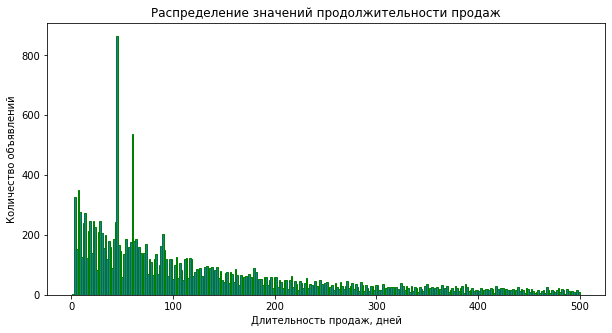

In [106]:
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 300, range=(1, 500), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений продолжительности продаж')
plt.xlabel('Длительность продаж, дней')
plt.ylabel('Количество объявлений')
plt.show()

Видно всплески. Построим диаграмму в месте этих всплесков, в диапазоне от 40 до 100 дней

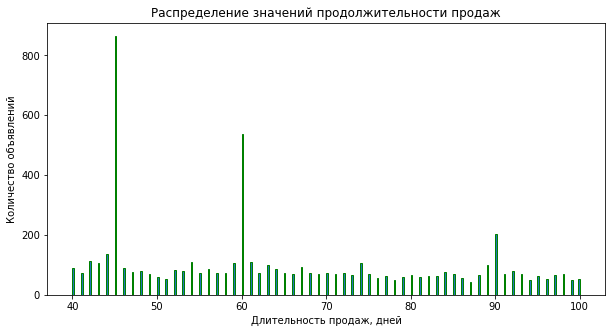

In [107]:
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 300, range=(40, 100), figsize=(10, 5), ec='green', legend=False)
plt.title('Распределение значений продолжительности продаж')
plt.xlabel('Длительность продаж, дней')
plt.ylabel('Количество объявлений')
plt.show()

Вывыдем среднее значение и медиану по столбцу **days_exposition**

In [108]:
data['days_exposition'].agg(['mean','median'])

mean      156.771602
median     74.000000
Name: days_exposition, dtype: float64

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- По графику распределения наблюдаются  всплески на **45, 60, и 95 день** продаж, возможно это связано с длительностью размещения объявления на платформе, после которого начинается платное размещение объявления, или снятие его с публикации
- Среднее значение и медиана по столбцу **days_exposition** подтверждает 95-й день размещения объявления
- Объявления с большой длительностью продаж (более одного года) можно отнести к "забытым", или мошенническим
- Очень быстрые продажи можно считать менее недели, т.к. покупка недвижимости - это значимая покупка, к которой люди подходят внимательно, следовательно нужно время на сделку

## 4.3 Факторы, влияющие на общую стоимость объекта

Посмотрим общую информацию на матрице рассеяния

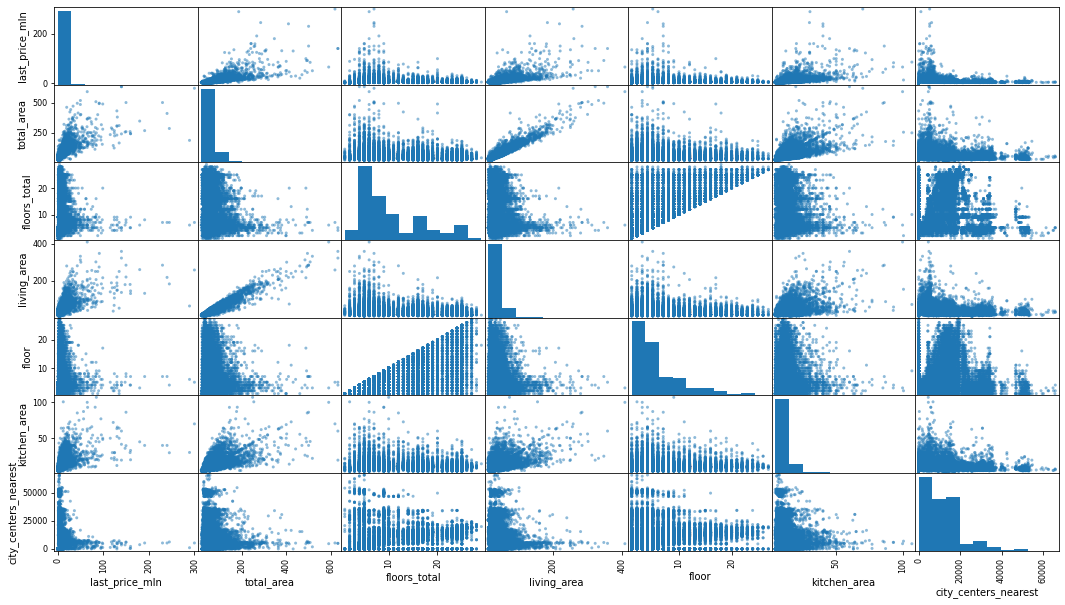

In [109]:
total_pict = ['last_price_mln', 'total_area', 'floors_total', 'living_area',
                 'floor',  'kitchen_area', 'city_centers_nearest']
pd.plotting.scatter_matrix(data[total_pict],figsize=(18,10));

### 4.3.1 Зависимость стоимости объекта от общей площади

Проанализируем зависимость цена от площади, числа комнат, расстояния от центра

In [110]:
# Вывод названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'last_price_mln',
       'price_one_square_meter', 'exposition_weekday', 'exposition_month',
       'exposition_year', 'floor_category', 'city_centers_nearest_km'],
      dtype='object')

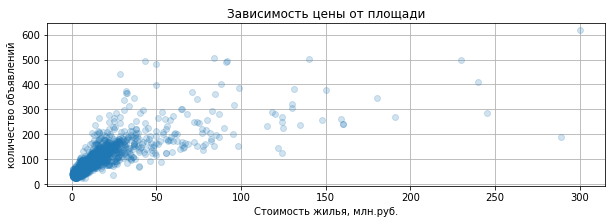

In [111]:
data_pivot = data.pivot_table(index='last_price_mln', values=['total_area'])

data_pivot.plot(
    style='o',grid=True, figsize=(10, 3), legend=False, title='Зависимость цены от площади', alpha = 0.2)
plt.xlabel('Стоимость жилья, млн.руб.')
plt.ylabel('количество объявлений')
plt.show()

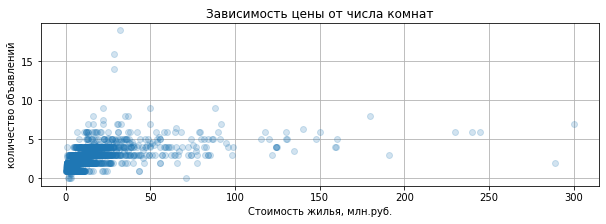

In [112]:
data_pivot = data.pivot_table(index='last_price_mln', values=['rooms'])
data_pivot.plot(
    style='o', grid=True, legend=False, figsize=(10, 3), title='Зависимость цены от числа комнат', alpha = 0.2)
plt.xlabel('Стоимость жилья, млн.руб.')
plt.ylabel('количество объявлений')
plt.show()

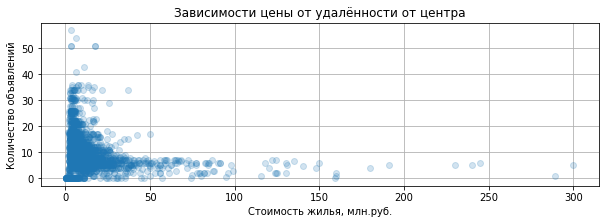

In [113]:
data_pivot = data.pivot_table(index='last_price_mln', values=['city_centers_nearest_km'])
data_pivot.plot(
    style='o',grid=True, legend=False, figsize=(10, 3), alpha = 0.2, title='Зависимости цены от удалённости от центра')
plt.xlabel('Стоимость жилья, млн.руб.')
plt.ylabel('Количество объявлений')
plt.show()

Изучим корреляцию стоимости жилья с другими показателями

Общая матрица корреляции

In [114]:
# Список параметров для таблицы
corr_param_1 = data[['last_price_mln',
                     'total_images',
                     'total_area',
                     'rooms',
                     'ceiling_height',
                     'living_area',
                     'kitchen_area',
                     'balcony',
                     'airports_nearest',
                     'parks_around_3000',
                     'parks_nearest',
                     'ponds_around_3000',
                     'ponds_nearest',
                     'days_exposition',
                     'city_centers_nearest_km']]

corr_matrix_1 = corr_param_1.corr().round(2)

display(corr_matrix_1)

,last_price_mln,total_images,total_area,rooms,ceiling_height,living_area,kitchen_area,balcony,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,city_centers_nearest_km
last_price_mln,1.00,0.12,0.72,0.41,0.35,0.65,0.56,0.00,0.13,0.24,-0.02,0.24,-0.11,0.07,-0.06
total_images,0.12,1.00,0.11,0.10,0.05,0.10,0.11,0.05,0.04,0.04,-0.01,0.01,-0.00,-0.06,0.00
total_area,0.72,0.11,1.00,0.76,0.40,0.95,0.65,0.01,0.09,0.20,-0.02,0.20,-0.10,0.10,-0.08
rooms,0.41,0.10,0.76,1.00,0.25,0.83,0.32,-0.02,0.04,0.16,-0.05,0.12,-0.06,0.08,-0.06
ceiling_height,0.35,0.05,0.40,0.25,1.00,0.38,0.34,-0.04,0.04,0.25,-0.06,0.22,-0.12,0.08,-0.14
living_area,0.65,0.10,0.95,0.83,0.38,1.00,0.49,-0.01,0.07,0.21,-0.05,0.19,-0.09,0.09,-0.08
kitchen_area,0.56,0.11,0.65,0.32,0.34,0.49,1.00,0.04,0.10,0.13,0.02,0.18,-0.10,0.08,-0.07
balcony,0.00,0.05,0.01,-0.02,-0.04,-0.01,0.04,1.00,0.02,-0.07,0.03,-0.04,0.02,-0.02,0.03
airports_nearest,0.13,0.04,0.09,0.04,0.04,0.07,0.10,0.02,1.00,0.25,-0.07,0.24,0.01,0.01,0.60
parks_around_3000,0.24,0.04,0.20,0.16,0.25,0.21,0.13,-0.07,0.25,1.00,-0.26,0.40,-0.17,0.04,0.10


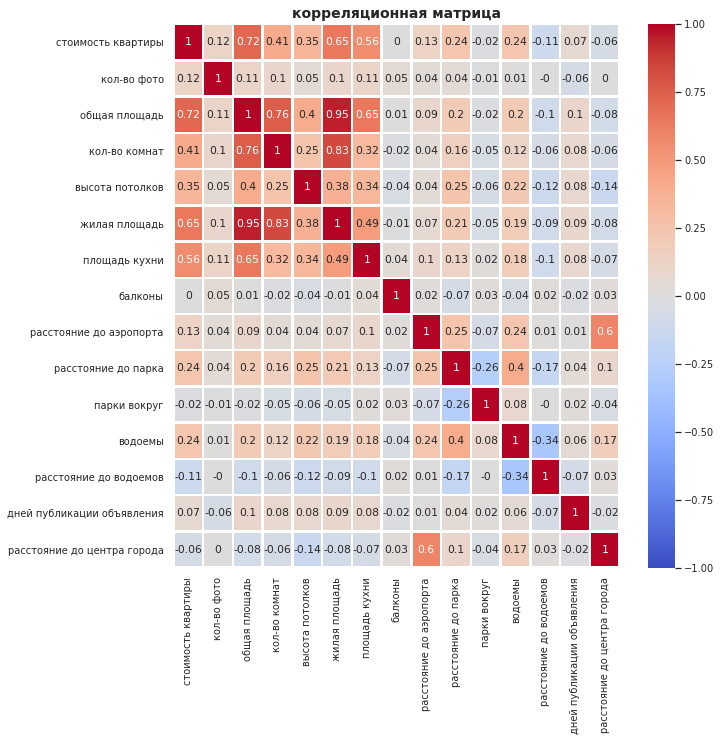

In [115]:
# Список с названиями параметров по осям
corr_labels_1 = ['стоимость квартиры',
                 'кол-во фото',
                 'общая площадь',
                 'кол-во комнат',
                 'высота потолков',
                 'жилая площадь',
                 'площадь кухни',
                 'балконы',
                 'расстояние до аэропорта',
                 'расстояние до парка',
                 'парки вокруг',
                 'водоемы',
                 'расстояние до водоемов',
                 'дней публикации объявления',
                 'расстояние до центра города']

# Вывод матрицы корреляции в графическом виде
plt.figure(figsize = (10, 10))
sns.set(font_scale=0.9)

sns.heatmap(corr_matrix_1, annot=True,
            linewidths=1.5, cmap='coolwarm',
            vmin=-1, vmax=1,
            yticklabels=corr_labels_1,
            xticklabels=corr_labels_1)

plt.title('корреляционная матрица', fontweight='bold', fontsize=14)
plt.show()

Уменьшим количество параметров для визуализации корреляции для бОльшего контраста

In [116]:
# Список параметров для таблицы
corr_param_2 = [
    'last_price_mln',
    'total_area',
    'rooms',
    'city_centers_nearest_km',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

# Матрица корреляции
corr_matrix_2 = data[corr_param_2].corr()

# Вывод матрицы
display(corr_matrix_2)

,last_price_mln,total_area,rooms,city_centers_nearest_km,exposition_weekday,exposition_month,exposition_year
last_price_mln,1.000000,0.721757,0.412599,-0.058747,-0.004250,0.000126,-0.048939
total_area,0.721757,1.000000,0.759939,-0.080363,-0.005637,0.004426,-0.078910
rooms,0.412599,0.759939,1.000000,-0.061823,-0.004788,-0.004402,-0.053872
city_centers_nearest_km,-0.058747,-0.080363,-0.061823,1.000000,0.001743,-0.003378,-0.008569
exposition_weekday,-0.004250,-0.005637,-0.004788,0.001743,1.000000,0.011800,-0.003187
exposition_month,0.000126,0.004426,-0.004402,-0.003378,0.011800,1.000000,-0.271046
exposition_year,-0.048939,-0.078910,-0.053872,-0.008569,-0.003187,-0.271046,1.000000


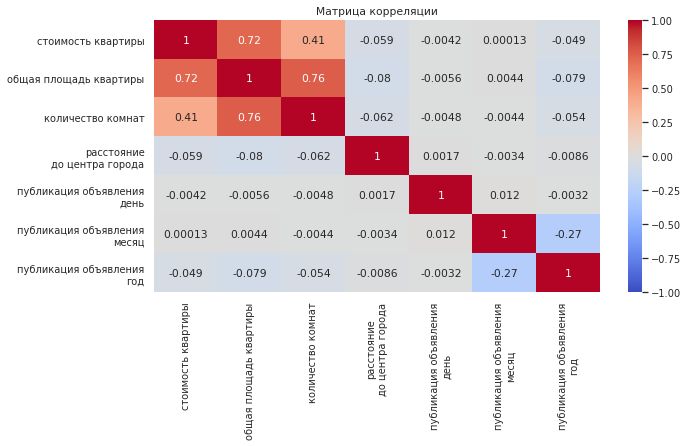

In [117]:
# Список с названиями параметров по осям
corr_labels_2 = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Вывод матрицы корреляции в графическом виде
plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix_2, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels_2,
            xticklabels=corr_labels_2)
plt.title('Матрица корреляции')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- на матрице корреляции явно прослеживается корреляция стоимости жилья от общей площади квартиры и количества комнат в ней (чем больше площадь и количество комнат - тем выше цена)
- невысокое влияние оказывают такие показатели как расстояние до центра города, расстояние до парков, высота потолков
- меньше всего коррелируют дата публикации, количество парок, балконы

### 4.3.2 Зависимость стоимости объекта от жилой площади

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


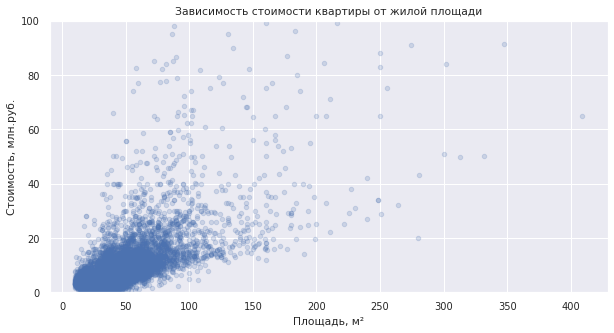

In [118]:
# построение графика типа scatter
data.plot(x='living_area', y ='last_price_mln', kind ='scatter', figsize=(10, 5), legend=False, alpha = 0.2)

plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Стоимость, млн.руб.')
plt.ylim(0, 100)
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наблюдается прямая зависимость стоимости квартиры от ее площади
- чаще попадаются объявления с малой площадью, но высокой ценой, чем с большой площадью, но низкой ценой

### 4.3.3 Зависимость стоимости объекта от площади кухни

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


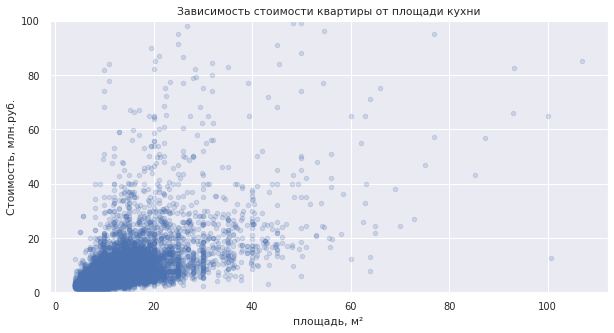

In [119]:
# построение графика типа scatter
data.plot(x='kitchen_area', y ='last_price_mln', kind ='scatter', figsize=(10, 5), legend=False, alpha = 0.2)

plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('Стоимость, млн.руб.')
plt.ylim(0, 100)
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- в целом наблюдается прямая зависимость стоимости квартиры от площади кухни
- чаще попадаются объявления с большой площадью кухни, но низкой ценой квартиры (видимо одно- двухкомнатные с большой кухней), чем маленькой кухней и высокой стоимостью квартиры

### 4.3.4 Зависимость стоимости объекта от количества комнат

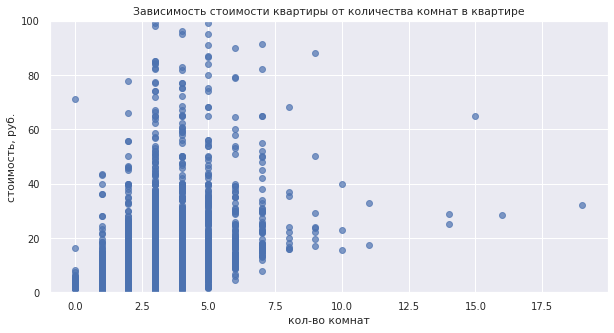

In [120]:
data.plot(x = 'rooms', y = 'last_price_mln', style='o', grid=True, legend=False, figsize=(10, 5), alpha=0.7)
plt.title('Зависимость стоимости квартиры от количества комнат в квартире')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, руб.')
plt.ylim(0, 100)
plt.show()

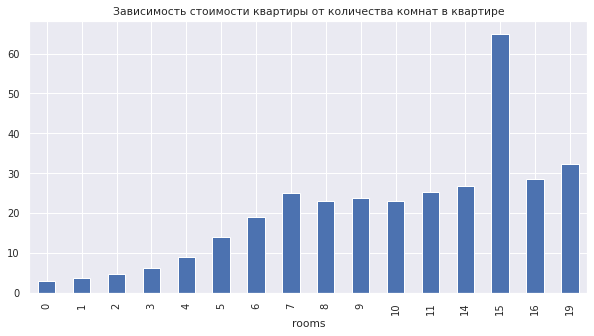

In [121]:
(data.groupby('rooms')['last_price_mln'].median()
 .plot.bar(figsize=(10,5), title='Зависимость стоимости квартиры от количества комнат в квартире'))
 
plt.show()

### 4.3.5 Зависимость стоимости объекта от этажа расположения квартиры

Зависимость цены от категории расположения квартиры (на первом, последнем или другом этаже)

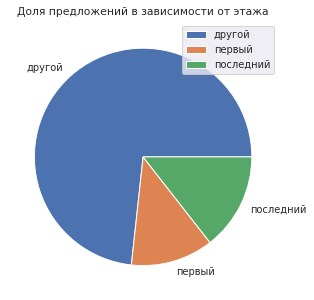

In [122]:
data.pivot_table(index='floor_category',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(5, 5), label='', title='Доля предложений в зависимости от этажа')
plt.show()

,mean,count,median
floor_category,,,
другой,6.676551e+06,17165,4850000
первый,4.831067e+06,2876,3900000
последний,6.791605e+06,3383,4350000


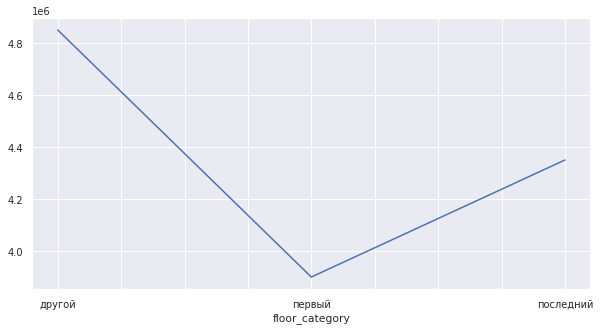

In [123]:
# Создание сводной таблицы
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

# Обозначение колонок в сводной таблице
pivot_table_floor_category.columns = ['mean', 'count', 'median']

#Строим зависимость
pivot_table_floor_category.plot(y = 'median', figsize=(10, 5), legend=False)

# Вывод сводной таблицы
pivot_table_floor_category

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
Из графика видно, что наименьшая стоимость квартир расположенных на первом этаже

### 4.3.6 Зависимость стоимости объекта от даты размещения объявления

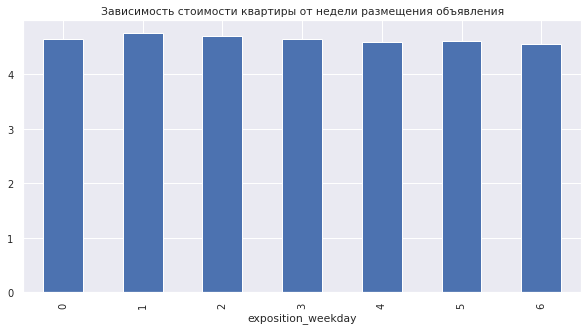

In [124]:
(data.groupby('exposition_weekday')['last_price_mln'].median()
 .plot.bar(figsize=(10,5), title='Зависимость стоимости квартиры от недели размещения объявления'))
 
plt.show()

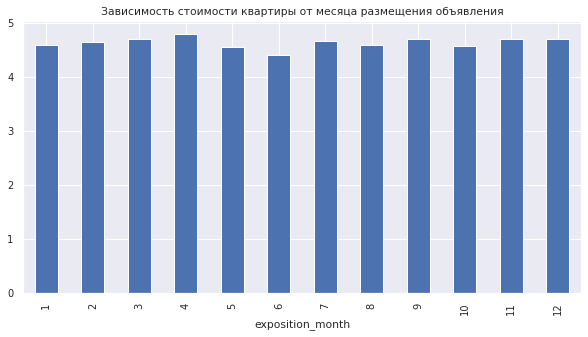

In [125]:
(data.groupby('exposition_month')['last_price_mln'].median()
 .plot.bar(figsize=(10,5), title='Зависимость стоимости квартиры от месяца размещения объявления'))
 
plt.show()

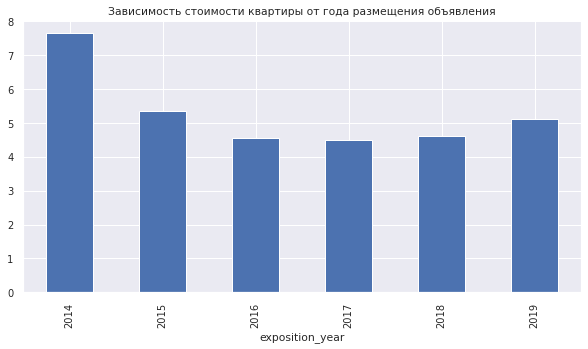

In [126]:
(data.groupby('exposition_year')['last_price_mln'].median()
 .plot.bar(figsize=(10,5), title='Зависимость стоимости квартиры от года размещения объявления'))
 
plt.show()

Посмотрим как изменялась стоимость одного квадратного метра жилья по годам

In [127]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'last_price_mln',
       'price_one_square_meter', 'exposition_weekday', 'exposition_month',
       'exposition_year', 'floor_category', 'city_centers_nearest_km'],
      dtype='object')

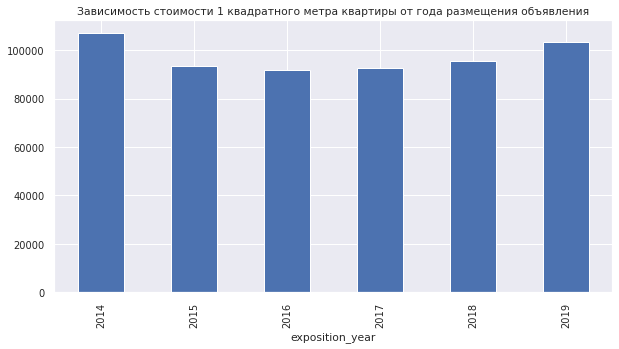

In [128]:
(data.groupby('exposition_year')['price_one_square_meter'].median()
 .plot.bar(figsize=(10,5), title='Зависимость стоимости 1 квадратного метра квартиры от года размещения объявления'))
 
plt.show()

Посмотрим еще на один график - изменение медианной общей площади квартиры по годам

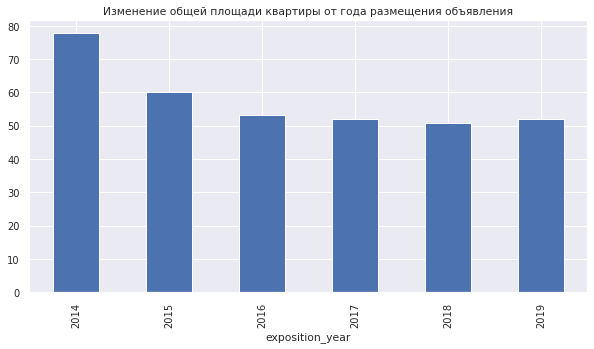

In [129]:
(data.groupby('exposition_year')['total_area'].median()
 .plot.bar(figsize=(10,5), title='Изменение общей площади квартиры от года размещения объявления'))
 
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- день и месяц публикации оказывает незначительную роль
- наибольшая стоимость жилья приходится на 2014 год, потом пошла на спад
- наименьшая стоимость квартир приходится на 2017г
- наименьшая стоимость квадратного метра квартиры приходится также на 2017 год, однако, провал не такой существенный, как у стоимости квартир. Видимо в этот период меьнше стали продавать дорогие большие квартиры, а количество предложений с низкой площадью увеличилось. Это подтверждается на графикк Изменения общей площади квартиры от года размещения объявления

## 4.4 Средняя цена квадратного метра в 10 населенных пунктах

In [130]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

санкт-петербург      15583
посёлок мурино         537
посёлок шушары         434
всеволожск             394
пушкин                 368
колпино                337
посёлок парголово      327
гатчина                306
деревня кудрово        294
выборг                 234
Name: locality_name, dtype: int64

In [131]:
# Вывод средней цены за м² по топ 10 населенным пунктам
top_10_localities_pivot = data.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
санкт-петербург,114326.462620
пушкин,103081.146739
деревня кудрово,92258.176871
посёлок парголово,90112.321101
посёлок мурино,85105.193669
посёлок шушары,78258.488479
колпино,75311.940653
всеволожск,68703.360406
гатчина,68678.303922


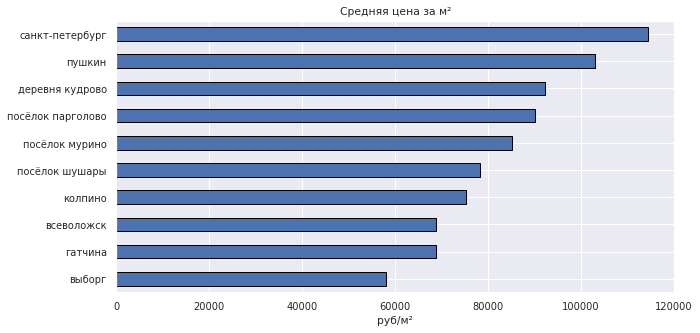

In [132]:
# График средней цены квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=False, grid=True, ec='black', figsize=(10, 5))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Доля стоимости квадратного метра по ТОП-10 населенных пунктов

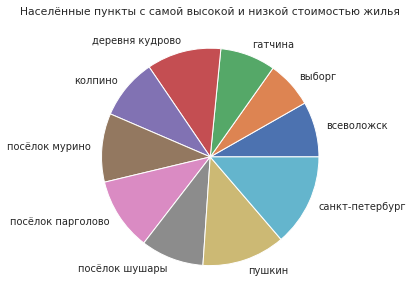

In [133]:
top_10_localities_pivot.pivot_table(index='locality_name',values='price_one_square_meter').plot.pie(y='price_one_square_meter', figsize=(5, 5), legend=False, label='', title='Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наибольшая стоимость квадратного метра - в г. Санкт-Петербург
- стоимость квадратного метра в г. Санкт-Петербург практически вдвое выше, чем входящий в ТОП-10 населенный пункт Всеволожск

## 4.5 Зависимость стоимости кваритры от расстояния до центра города

In [134]:
# выберем только Санкт-Петербург, посмотрим на основные данные
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15583 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15583 non-null  int64         
 1   last_price               15583 non-null  int64         
 2   total_area               15583 non-null  float64       
 3   first_day_exposition     15583 non-null  datetime64[ns]
 4   rooms                    15583 non-null  int64         
 5   ceiling_height           15583 non-null  float64       
 6   floors_total             15583 non-null  float64       
 7   living_area              15583 non-null  float64       
 8   floor                    15583 non-null  int64         
 9   is_apartment             15583 non-null  bool          
 10  studio                   15583 non-null  bool          
 11  open_plan                15583 non-null  bool          
 12  kitchen_area             15583 n

In [135]:
data_spb.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,last_price_mln,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2,755.0,0,13.000,120370.0,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2,574.0,558,5.196,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.289724,9,False,...,3,234.0,424,64.900,408176.0,4,7,2015,другой,7.0


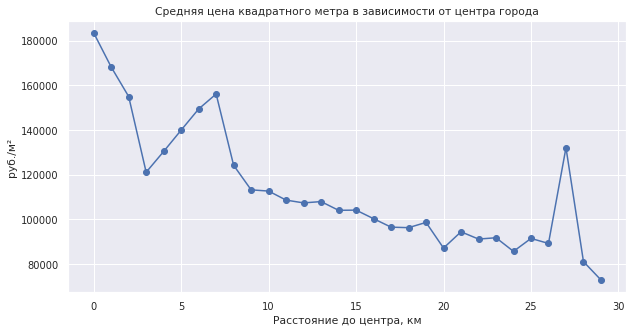

In [136]:
# Средняя цена квадратного метра до центра
(
data_spb
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(10, 5), legend=False)
)
plt.title('Средняя цена квадратного метра в зависимости от центра города')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('руб./м²')
plt.show()

<div style='border:solid blue 2px; padding: 20px'>

**Выводы:**
- наблюдается явный пик стоимости квадратного метра расположенного на расстоянии 27 км, возможно, в этом месте элитный район
- в целом, чем ближе к центру города - тем дороже жилье

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23424 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23424 non-null  int64         
 1   last_price               23424 non-null  int64         
 2   total_area               23424 non-null  float64       
 3   first_day_exposition     23424 non-null  datetime64[ns]
 4   rooms                    23424 non-null  int64         
 5   ceiling_height           23424 non-null  float64       
 6   floors_total             23424 non-null  float64       
 7   living_area              23424 non-null  float64       
 8   floor                    23424 non-null  int64         
 9   is_apartment             23424 non-null  bool          
 10  studio                   23424 non-null  bool          
 11  open_plan                23424 non-null  bool          
 12  kitchen_area             23424 n

In [138]:
np.round(data.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
total_images,23424.0,9.87,5.68,0.00,6.00,9.00,14.00,50.0
last_price,23424.0,6466579.34,8657373.31,430000.00,3450000.00,4650000.00,6800000.00,300000000.0
total_area,23424.0,60.45,34.99,20.00,40.00,52.00,70.00,631.2
rooms,23424.0,2.08,1.07,0.00,1.00,2.00,3.00,19.0
ceiling_height,23424.0,2.70,0.22,2.40,2.60,2.65,2.70,5.0
floors_total,23424.0,10.63,6.52,1.00,5.00,9.00,16.00,29.0
living_area,23424.0,34.64,22.08,10.00,19.00,30.00,42.20,409.0
floor,23424.0,5.87,4.84,1.00,2.00,4.00,8.00,27.0
kitchen_area,23424.0,10.50,5.94,4.00,7.00,9.00,12.00,107.0
balcony,23424.0,0.59,0.96,0.00,0.00,0.00,1.00,5.0


<div style='border:solid blue 5px; padding: 20px'>
    
В заключение посчитаем насколько уменьшился датафрейм

In [139]:
len_data_out = len(data)
len_data_out

23424

In [140]:
len_data_out = len(data)
data_decrease = round(((len_data_in - len_data_out) / len_data_in * 100), 2)
print('Датафрейм уменьшился на:', data_decrease, '%')

Датафрейм уменьшился на: 1.16 %


# 5. Общий вывод

<div style='border:solid violet 5px; padding: 20px'>

**Краткий обзор проделанной работы**


*п. 1 Изучены входные данные*
1) Выполнен импорт данных из датафрейма **real_estate_data.csv**
2) Выведена общая информация о датафрейме
3) Приведено описание имеющихся данных
4) Построена общая гистограмма для всех числовых столбцов датафрейма
5) Посчитаны пропуски в столбцах
6) Приведены основные статистические данные датафрейма


*п. 2 Выполнена предобработка данных*
1) Проведен анализ пропусков в столбцах
2) Визуализация пропущенных данных по строкам датафрейма
3) Доля пропусков по столбцам
4) Проведена замена пропусков в столбце **floors_total** на значения из колонки **floor**, заполнены пропуски в столбце **kitchen_area** отношением к общей площади
5) Проведен анализ типов данных в датафрейме
6) Заменены пропуски на нули, изменен тип данных на целые числа (integer)
7) Приведен формат даты в столбце **first_day_exposition** в читабельный вид
8) Проведена проверка наличие полных (явных) дубликатов в исходных данных
9) Выведены уникальные имена в колонке **locality_name** - название населённого пункта, посчитано их количество, приведены все слова к нижнему регистру
10) Преобразование разных формулировки названий населенных пунктов к единому стилю
11) Удалены пустые строки без названия населенного пункта
12) Выведена описательная статистика для выявления аномалий значений по всем столбцам
13) Приведены статистические данные, диаграммы размаха и диаграммы распределения для следующих столбцов:
- Стоимость жилья **last_price**
- Высота потолков **ceiling_height**
- Количество этажей в доме **floors_total**
- Жилая площадь **living_area**
- Площадь кухни **kitchen_area**

*п. 3. Добавлены новые столбцы в таблицу*

В датафрейм добавлены новые столбцы:
- Стоимость квадратного метра **price_one_square_meter**
- Неделя публикации объявления **exposition_weekday**
- Месяц публикации объявления **exposition_month**
- Год публикации объявления **exposition_year**
- Учет этажа жилья в доме **floor_category**
- Расстояние до центра населенного пункта в километрах **city_centers_nearest_km**

*п. 4. Проведен исследовательский анализ данных*

1) Изучены параметры объектов и их зависимости по следующим показателям (столбцам):
- Общая площадь **total_area**
- Жилая площадь **living_area**
- Площадь кухни **kitchen_area**
- Цена объекта **last_price**
- Количество комнат **rooms**
- Высота потолков **ceiling_height**
- Этаж квартиры **floor**
- Тип этажа квартиры **floor_category**
- Общее количество этажей в доме **floors_total**
- Расстояние до центра города **city_centers_nearest**
- Расстояние до ближайшего аэропорта **airports_nearest**
- Расстояние до ближайшего парка **parks_nearest**
- День и месяц публикации объявления **exposition_weekday**

2) Проведен анализ длительности продажи квартир
3) Оценены факторы, влияющие на общую стоимость объекта, такие как:
- Зависимость стоимости объекта от общей площади
- Зависимость стоимости объекта от жилой площади
- Зависимость стоимости объекта от площади кухни
- Зависимость стоимости объекта от количества комнат
- Зависимость стоимости объекта от этажа расположения квартиры по этажам
- Зависимость стоимости объекта от даты размещения объявления
- Зависимость стоимости кваритры от расстояния до центра города

4) Определена средняя цена квадратного метра в 10 населенных пунктах

<br>

**Главные выводы**
<br>
В полученных данных было много пропусков, которые необходимо было подготовить для дальнейшей работы. Качественный и правильный сбор данных очень важен для анализа, т.к. потеря данных в определенных ячейках влияет на искажение других показателе ввиду того, что пустые ячейки либо удаляются, либо заменяются "заплатками".

Анализируя полученные данные можно сделать вывод, что наибольшее влияние на стоимость квартиры оказывает её площадь и локаци (населенный пункт). Чем больше площадь квартиры и крупнее город, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость недвижимости влияет и расстояние до центра населенного пункта. Чем ближе квартира к центру, тем выше ее стоимость. Повышенная стоимость квадратного метра, которая относится к зоне центра города, располагается в радиусе 7-8 км.
    
Датафрейм уменьшился на: 1.16 %, а это значит, что полученные результаты можно считать не искажены из-за обработки пропусков

**Рекомендации по использованию исследуемых зависимостей**
- сотавление моделей прогнозирования стоимости жилья для девелоперов при планировании строительство жилых домов
- предоставление аналитических данных агенствам недвижимости
- определение оптимальной конкурентной стоимости при "срочных" продажах розничным клиентам
- определение арендной стоимости недвижимости для предпринимателей 